# Syarah.com Market Analytics

## Load Data & Libraries

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from get_raw_data import get_data

df = df = get_data()

Data yang akan digunakan diambil dari MySQl, yang bersumber dari Syarah.com used car listing dataset dari Kaggle.com, dari author Turki Bintaleb. Data ini bisa memberikan gambaran market atau pasar mobil bekas di syarah.com, yang berasal dari Saudi Arabia. Data akan kita import dari MySQl database menggunakan script python get_raw_data dengan function get_data.

In [505]:
df.head()

,listing_id,year,engine_size,mileage,price,negotiable,make_name,type_name,origin_name,color_name,options_name,gear_type,fuel_type,condition_type,region_name
0,1,2018,5.7,103000,114000.0,0,Chrysler,C300,Saudi,Black,Full,Automatic,Gas,Used,Riyadh
1,2,2016,4.8,5448,NaN,1,Nissan,Patrol,Saudi,White,Full,Automatic,Gas,Used,Riyadh
2,3,2019,1.5,72418,27500.0,0,Nissan,Sunny,Saudi,Silver,Standard,Automatic,Gas,Used,Riyadh
3,4,2019,1.6,114154,43000.0,0,Hyundai,Elantra,Saudi,Grey,Standard,Automatic,Gas,Used,Riyadh
4,5,2019,2.0,41912,59500.0,0,Hyundai,Elantra,Saudi,Silver,Semi Full,Automatic,Gas,Used,Riyadh


# Exploratory Data Analysis

## General Analysis


Sebelum melakukan analisa, data ini akan kita lihat secara general agar kita bisa mendapatkan pemahaman dimensi dan apa saja insight yang bisa kita dapatkan.

In [506]:
df.head()

,listing_id,year,engine_size,mileage,price,negotiable,make_name,type_name,origin_name,color_name,options_name,gear_type,fuel_type,condition_type,region_name
0,1,2018,5.7,103000,114000.0,0,Chrysler,C300,Saudi,Black,Full,Automatic,Gas,Used,Riyadh
1,2,2016,4.8,5448,NaN,1,Nissan,Patrol,Saudi,White,Full,Automatic,Gas,Used,Riyadh
2,3,2019,1.5,72418,27500.0,0,Nissan,Sunny,Saudi,Silver,Standard,Automatic,Gas,Used,Riyadh
3,4,2019,1.6,114154,43000.0,0,Hyundai,Elantra,Saudi,Grey,Standard,Automatic,Gas,Used,Riyadh
4,5,2019,2.0,41912,59500.0,0,Hyundai,Elantra,Saudi,Silver,Semi Full,Automatic,Gas,Used,Riyadh


In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      8248 non-null   int64  
 1   year            8248 non-null   int64  
 2   engine_size     8164 non-null   float64
 3   mileage         8248 non-null   int64  
 4   price           5652 non-null   float64
 5   negotiable      8248 non-null   int64  
 6   make_name       8248 non-null   object 
 7   type_name       8248 non-null   object 
 8   origin_name     8153 non-null   object 
 9   color_name      8248 non-null   object 
 10  options_name    8139 non-null   object 
 11  gear_type       8174 non-null   object 
 12  fuel_type       8248 non-null   object 
 13  condition_type  8248 non-null   object 
 14  region_name     8248 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 966.7+ KB


Dari info() di atas, bisa kita perhatikan bahwa ada 14 jenis data di dalam dataset ini. Berdasarkan penuturan author dari data ini di Kaggle.com, data-data di atas memiliki data dictionary sebagai berikut:

| Feature        | Description                               |
|----------------|-------------------------------------------|
| **Price**      | Harga Mobil di Listing Syarah.com           |
| **Make**       | Manufaktur Mobil                          |
| **Type**       | Tipe Mobil                                |
| **Year**       | Tahun Manufaktur Mobil                    |
| **Color**      | Warna Mobil                               |
| **Options**    | Jenis Opsi tipe Mobil                     |
| **Engine Size**| Ukuran Mesin                              |
| **Fuel Type**  | Tipe Bensin Mesin                         |
| **Gear_Type**  | Tipe Transmisi Mobil                      |
| **Region**     | Daerah Asal Listing                       |
| **Origin**     | Asal Mobil                                |
| **Mileage**    | Jumlah Penggunaan Mobil (Mile)            |
| **Condition**    | Kondisi Mobil (Baru/Bekas)            |
| **Negotiable** | Status Harga Mobil (Nego/Tetap) Jika Nego, maka Price = 0          |


terlihat adanya perbedaan penamaan column, untuk kemudahan analysis kita akan membuat mapping dari nama teknis dari SQl menjadi lebih user friendly sesuai dengan author di kaggle.

In [508]:
column_mapping = {
    "price": "Price",
    "make_name": " Make ",
    "type_name": "Type",
    "year": "Year",
    "color_name": "Color",
    "options_name": "Options",
    "engine_size": "Engine_Size",
    "fuel_type": "Fuel_Type",
    "gear_type": "Gear_Type",
    "region_name": "Region",
    "origin_name": "Origin",
    "mileage": "Mileage",
    "condition_type": "Condition",
    "negotiable": "Negotiable"
}
df = df.rename(columns=column_mapping)


In [509]:
df.head()

,listing_id,Year,Engine_Size,Mileage,Price,Negotiable,Make,Type,Origin,Color,Options,Gear_Type,Fuel_Type,Condition,Region
0,1,2018,5.7,103000,114000.0,0,Chrysler,C300,Saudi,Black,Full,Automatic,Gas,Used,Riyadh
1,2,2016,4.8,5448,NaN,1,Nissan,Patrol,Saudi,White,Full,Automatic,Gas,Used,Riyadh
2,3,2019,1.5,72418,27500.0,0,Nissan,Sunny,Saudi,Silver,Standard,Automatic,Gas,Used,Riyadh
3,4,2019,1.6,114154,43000.0,0,Hyundai,Elantra,Saudi,Grey,Standard,Automatic,Gas,Used,Riyadh
4,5,2019,2.0,41912,59500.0,0,Hyundai,Elantra,Saudi,Silver,Semi Full,Automatic,Gas,Used,Riyadh


In [510]:
print("Rows, Columns:", df.shape)

Rows, Columns: (8248, 15)


Bisa di observasi bahwa dataset ini memiliki 115,472 data, 14 column dan 8428 rows. Ini berarti dataset ini berukuran Medium.

In [511]:
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]
print("Number of duplicated rows:", duplicate_count)

Number of duplicated rows: 0


Karena menggunakan database dari MySQL, maka tidak ada row duplikasi secara fitur dari database SQL.

In [512]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,8248.0,4124.500000,2381.136843,1.0,2062.75,4124.5,6186.25,8248.0
Year,8248.0,2014.014064,5.935349,1936.0,2012.00,2016.0,2018.00,2022.0
Engine_Size,8164.0,3.288168,1.517420,1.0,2.00,3.0,4.30,9.0
Mileage,8248.0,149412.813531,345525.845645,100.0,37000.00,101657.5,195552.00,20000000.0
Price,5652.0,78536.591826,76073.736695,0.0,35000.00,58000.0,95000.00,1150000.0
Negotiable,8248.0,0.314743,0.464442,0.0,0.00,0.0,1.00,1.0


In [513]:
df.isnull().sum()

listing_id        0
Year              0
Engine_Size      84
Mileage           0
Price          2596
Negotiable        0
 Make             0
Type              0
Origin           95
Color             0
Options         109
Gear_Type        74
Fuel_Type         0
Condition         0
Region            0
dtype: int64

Disini kita mengecek apakah ada dari dataset ini yang Missing datanya. terlihat ada banyak listing yang missing di data price dan engine size, serta sedikit data yang missing di origin, options dan gear type. data yang missing dengan jumlah besar harus di lakukan pre-processing, yang metode nya akan kita pilih setelah melihat data lebih jauh

In [514]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")


 Make : 65
Type: 435
Origin: 3
Color: 15
Options: 3
Gear_Type: 2
Fuel_Type: 3
Condition: 1
Region: 27


Disini terlihat bahwa Type, Make, dan Region memiliki jumlah data unik yang tinggi dengan Type paling besar di 435, menunjukkan variasi dari mobil yang ada di dataset ini. Ini juga penting untuk di perhatikan jika melakukan encoding agar data cardinality tidak terlalu besar.

In [515]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

 Make : ['Chrysler' 'Nissan' 'Hyundai' 'Honda' 'Toyota' 'GMC' 'Chevrolet'
 'Mercedes' 'MINI' 'Lexus' 'Land Rover' 'Mazda' 'Ford' 'Kia' 'Genesis'
 'Cadillac' 'Geely' 'MG' 'Jeep' 'INFINITI' 'Dodge' 'Ferrari' 'Great Wall'
 'Jaguar' 'GAC' 'Renault' 'Suzuki' 'Peugeot' 'Changan' 'HAVAL' 'BMW'
 'Rolls-Royce' 'Porsche' 'Mitsubishi' 'Isuzu' 'Subaru' 'Zhengzhou' 'Audi'
 'Lincoln' 'Volkswagen' 'Daihatsu' 'Fiat' 'Bentley' 'FAW' 'Chery'
 'Aston Martin' 'Pontiac' 'Mercury' 'BYD' 'Classic' 'SsangYong' 'Hummer'
 'Other' 'Maserati' 'Lifan' 'Foton' 'Tata' 'Victory Auto' 'Škoda' 'JAC'
 'Iveco' 'Volvo' 'Ashok' 'MAN' 'Buick']
Type: ['C300' 'Patrol' 'Sunny' 'Elantra' 'Accord' 'Land Cruiser' 'Yukon'
 'Impala' 'Yaris' 'Camry' 'Tahoe' 'CLA' 'E' 'Accent' 'Corolla' 'Copper'
 'Prado' 'Civic' 'Furniture' 'RX' 'Range Rover' 'Avalon' 'Bus Urvan'
 'Aurion' 'Malibu' 'Rav4' 'CX9' 'Expedition' 'ES' 'Cadenza' 'Tucson'
 'Platinum' 'G80' 'Sonata' 'LX' 'Senta fe' 'GX' 'Azera' 'CT-S' 'EC7' 'ZS'
 'Kona' 'Grand Cherokee' 'Opti

Disini kita ingin melihat adakah value yang tidak masuk akal atau bersifat outlier, seperti nama hewan di tipe mobil yang tidak ada wujudnya. column condition sepertinya hanya memiliki 1 value sesuai dengan dataset yaitu used cars. gear type, options dan origin terlihat ada value "none" yang merupakan sebuah value bersifat tidak jelas, perlu ada pre processing.

## Target Variable Analysis

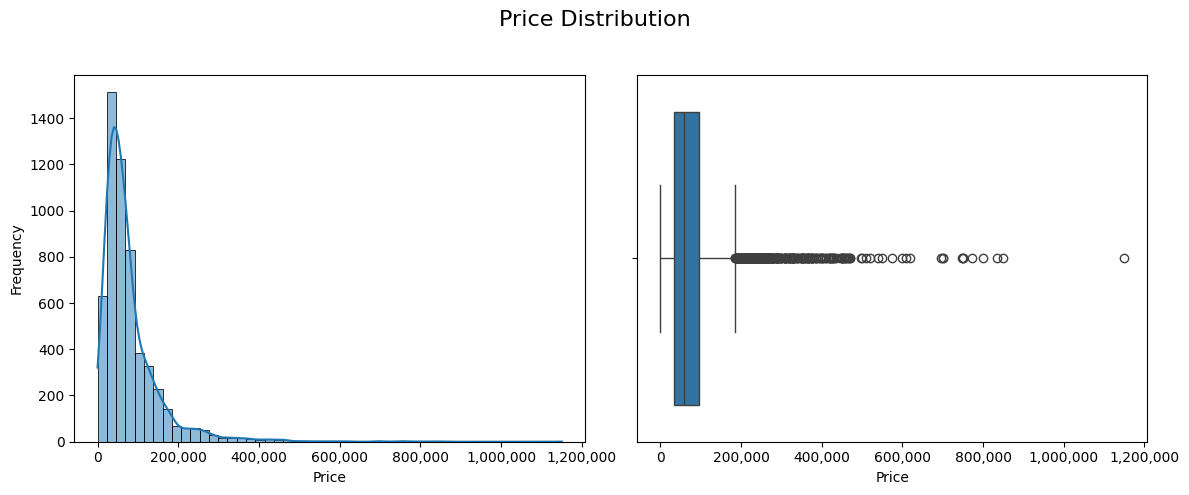

In [516]:
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Price'], bins=50, kde=True, ax=axes[0])
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.boxplot(x=df['Price'], ax=axes[1])
axes[1].set_xlabel("Price")
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

fig.suptitle("Price Distribution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Untuk melihat dengan lebih mudah distribusi target variable yaitu harga mobil atau Price, maka kita akan melihat dengan Boxplot dan Histogram. Disini bisa dilihat adanya outlier yang sangat besar, di angka 400k ke atas. Datanya sendiri terlihat terdistribusi paling banyak atanra 0 sampai sekitar 300k untuk harga. Boxplot menunjukkan ada banyak outlier di atas 200k.

## Numerical Features Analysis


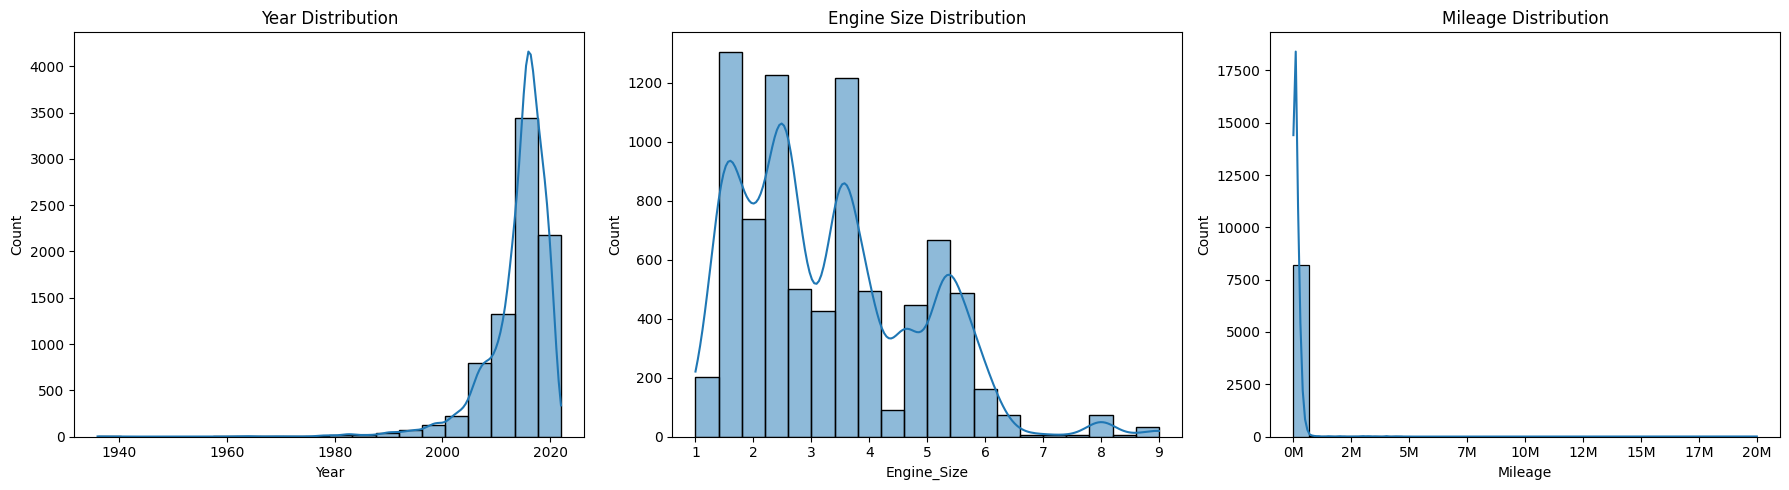

In [517]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Year'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Year Distribution")

sns.histplot(df['Engine_Size'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Engine Size Distribution")

sns.histplot(df['Mileage'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Mileage Distribution")
axes[2].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

plt.tight_layout()
plt.show()

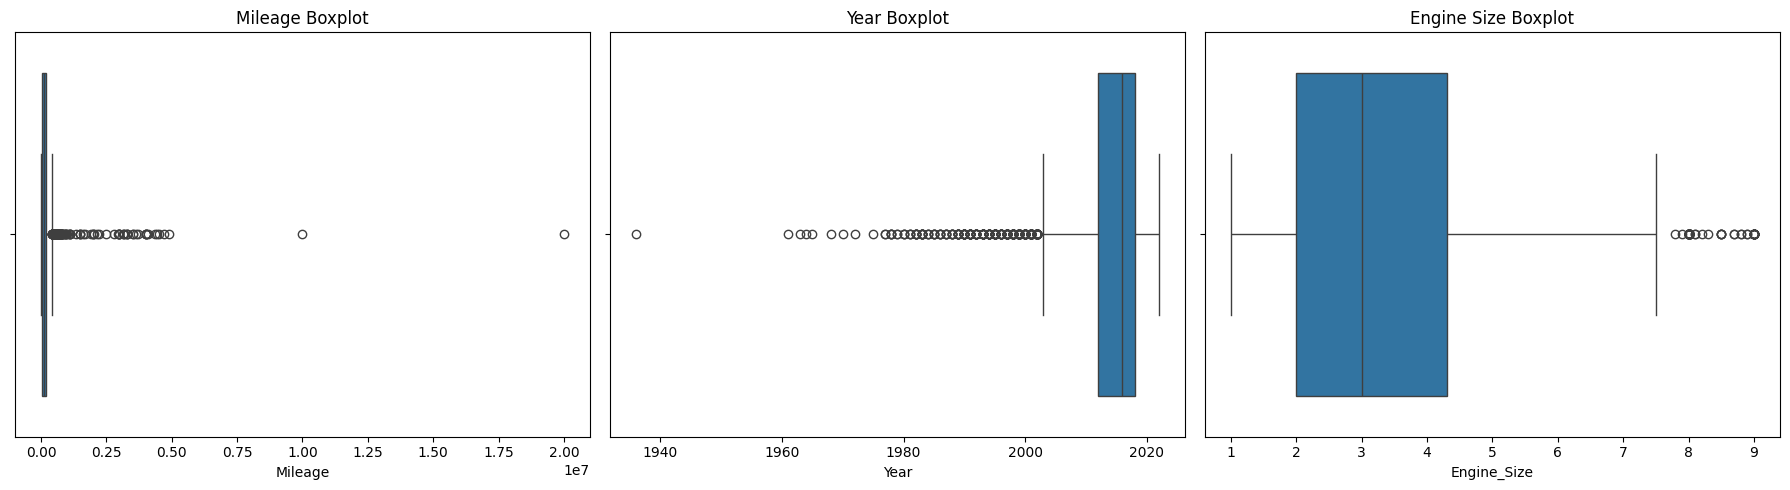

In [518]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x=df['Mileage'], ax=axes[0])
axes[0].set_title("Mileage Boxplot")

sns.boxplot(x=df['Year'], ax=axes[1])
axes[1].set_title("Year Boxplot")

sns.boxplot(x=df['Engine_Size'], ax=axes[2])
axes[2].set_title("Engine Size Boxplot")

plt.tight_layout()
plt.show()

Untuk memastikan distribusi setiap numerical column, maka kita akan membuat boxplot dan histogram untuk setiap column. Mileage menunjukkan outlier yang sangat besar, sehingga data distribusi normalnya sangat kecil box nya. Angka teratas menunjukkan 200 juta mileage, yang kecil kemungkinan datanya valid. Untuk Year, outlier tidak terlalu besar tapi sampel mobil dibawah tahun manufaktur 2000 termasuk kecil. Untuk mesin mobil terlihat ada sedikit outlier di atas 8L atau 8000 CC, ini akan kita explorasi nanti di outlier removal.

In [519]:
df[['Price', 'Year', 'Engine_Size', 'Mileage']].skew()


Price           3.691729
Year           -2.615889
Engine_Size     0.748983
Mileage        29.592851
dtype: float64

Skew() memastikan bahwa Mileage memiliki outlier yang ekstrem ke sebelah kanan, Price juga memiliki skew kanan yang cukup besar, sedangkan year memiliki skew kiri yang berukuran sedang.\

## Categorical Features Analysis


### Makes

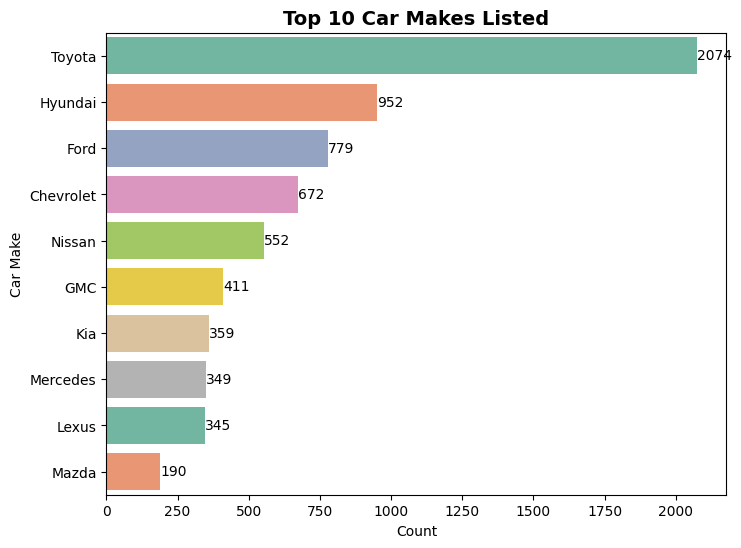

In [520]:
top_makes = df[' Make '].value_counts().nlargest(10)

plt.figure(figsize=(8,6))
ax = sns.barplot(
    y=top_makes.index,
    x=top_makes.values,
    hue=top_makes.index,
    palette="Set2"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Top 10 Car Makes Listed", fontsize=14, weight="bold")
plt.xlabel("Count")
plt.ylabel("Car Make")
plt.show()


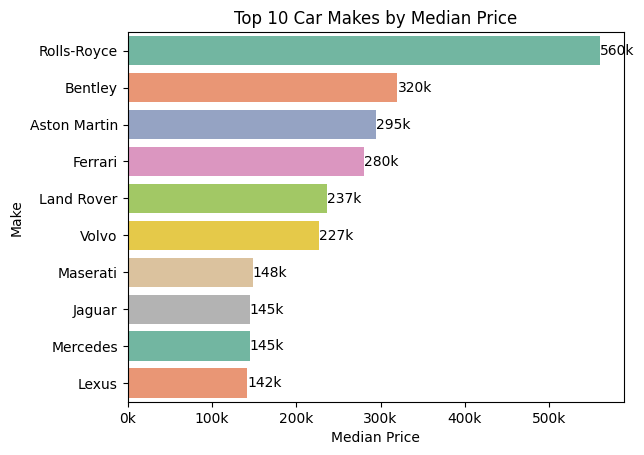

In [521]:
top10_make_median_price = df.groupby(' Make ')['Price'].median().nlargest(10)
ax = sns.barplot(x=top10_make_median_price.values, y=top10_make_median_price.index, hue=top10_make_median_price.index, palette="Set2")
def format_k(val):
    return f'{int(val/1000)}k'
for container in ax.containers:
    ax.bar_label(container, fmt=format_k)

import matplotlib.ticker as mticker
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))
plt.xlabel("Median Price")
plt.ylabel("Make")
plt.title("Top 10 Car Makes by Median Price")
plt.show()

Dari chart diatas kita bisa melihat merek manufaktur mobil teratas berdasarkan jumlah listing merek tersebut dan harga median. Harga median diambil karena besarnya outlier pada Price, sehingga mean dikhawatirkan tidak memberi representasi yang akurat.

Disini bisa terlihat bahwa toyota adalah merek paling populer dengan lebih dari 2000 listing, diikuti Hyundai dengan 941 pada posisi kedua. bisa diperhatikan bahwa 5 merek teratas adalah manufaktur mobil yang berada di kelas menengah kebawah. Ini dikonfirmasi dengan tidak adanya merek tersebut di merek dengan 10 harga median teratas. Rolls Royce memiliki harga median termahal sedangkan lexus dan mercedes terbukti memiliki listing yang cukup banyak walaupun dari segment mewah.

### Types

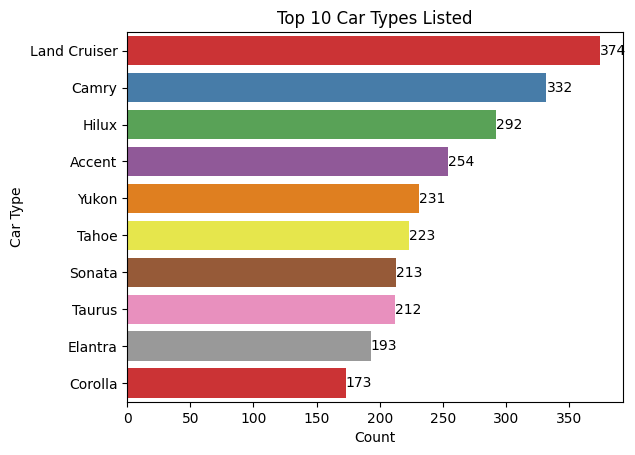

In [522]:
top_types = df['Type'].value_counts().nlargest(10)
ax = sns.barplot(y=top_types.index, x=top_types.values, hue=top_types.index, palette="Set1")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')


plt.title("Top 10 Car Types Listed")
plt.xlabel("Count")
plt.ylabel("Car Type")
plt.show()

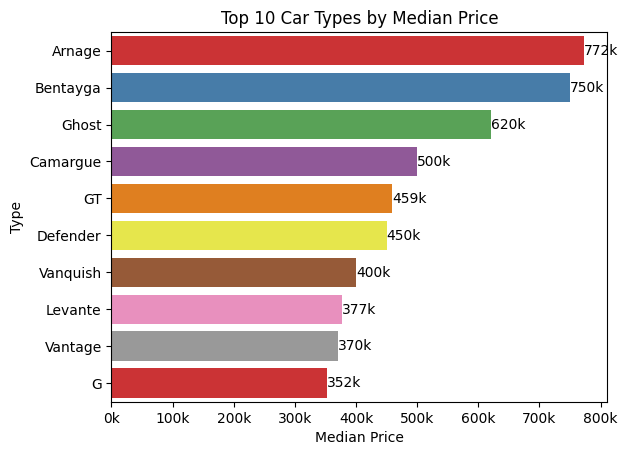

In [523]:
top10_type_median_price = df.groupby('Type')['Price'].median().nlargest(10)
ax = sns.barplot(x=top10_type_median_price.values, y=top10_type_median_price.index, hue=top10_type_median_price.index, palette="Set1")
def format_k(val):
    return f'{int(val/1000)}k'
for container in ax.containers:
    ax.bar_label(container, fmt=format_k)

import matplotlib.ticker as mticker
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))
plt.xlabel("Median Price")
plt.ylabel("Type")
plt.title("Top 10 Car Types by Median Price")
plt.show()

Dari chart di atas kita bisa melihat dominasi toyota di pasar mobil syarah.com, dimana 4 mobil terbanyak di listing adalah model mereka. Tipe mobil termahal sendiri didominasi oleh brand yang bersifat outlier seperti bentayga dari bentley dan arnage dari aston martin, dimana sampel mereka termasuk sedikit namun bernilai tinggi.

### Fuel_Type

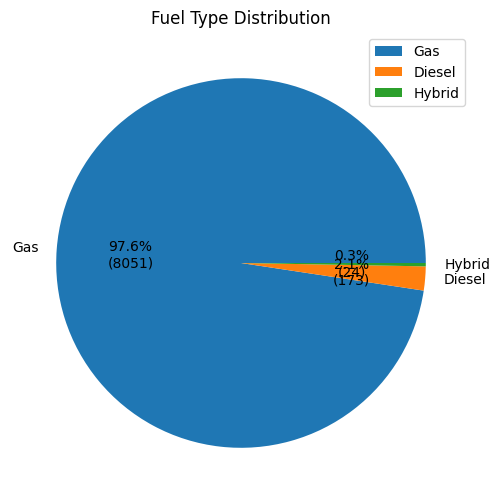

In [524]:
def absolute_value(val):
    a = round(val/100.*df['Fuel_Type'].value_counts().sum(), 0)
    return f'{val:.1f}%\n({int(a)})'

df['Fuel_Type'].value_counts().plot.pie(
    autopct=absolute_value,
    figsize=(6,6),
    legend=True  # <-- Add legend
)

plt.title("Fuel Type Distribution")
plt.ylabel("")  # hides y-axis label
plt.show()


Disini kita bisa memperhatikan bahwa hampir 98% mobil di syarah.com adalah mobil berbahan bakar bensin. Ini sesuai dengan demografis timur tengah dimana bensin termasuk murah, sehingga kurangya permintaan market untuk bahan bakar alternatif.

### Gear_Type

Text(0.5, 1.0, 'Gear Type Distribution')

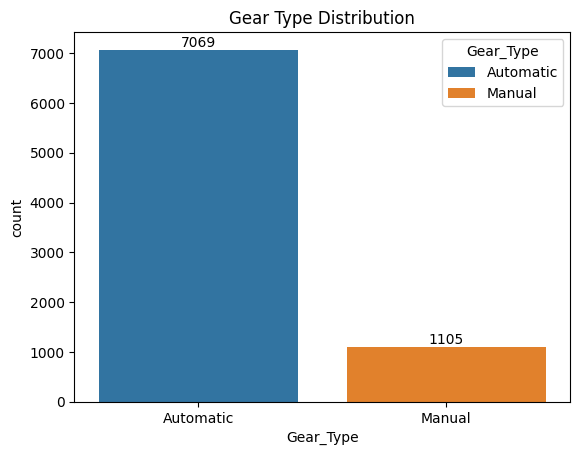

In [525]:
ax=sns.countplot(x='Gear_Type', data=df, hue="Gear_Type", palette="tab10")
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Gear Type Distribution")


Gear Type menunjukkan bahwa hampir 7000 dari 8000 sekian listing adalah mobil transmisi automatic, memberi gambaran preferensi berkendara pengguna di timur tengah.

### Options

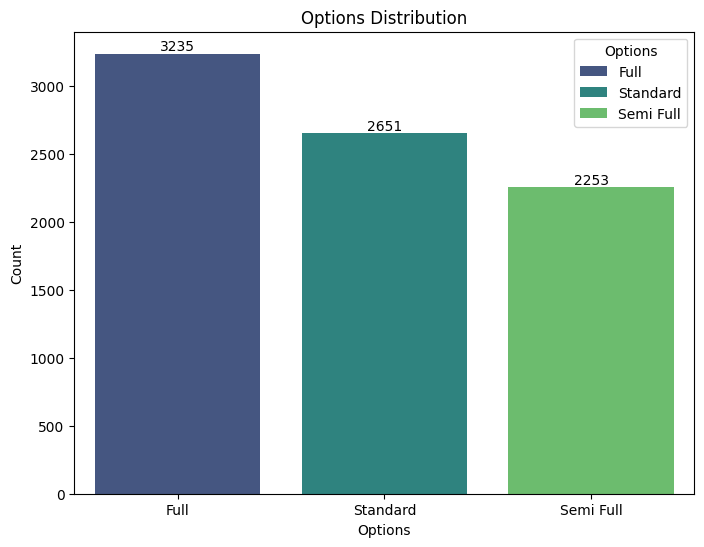

In [526]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Options', data=df, hue='Options', palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Options Distribution")
plt.xlabel("Options")
plt.ylabel("Count")
plt.show()

Option menunjukkan bahwa mobil di market bervariasi di tipe trim atau opsi mobil tersebut. Kebanyakan orang membeli langsung tipe teratas mobil tersebut, sedangkan tipe trim paling sedikit ada di Semi Full atau tipe menengah. Namun, oerbedaan nya terpaut sekitar 400 listing dari standard, menunjukkan bahwa kebanyakan orang memilih mobil dengan trim menengah-kebawah, namun tidak sedikit yang memilih untuk membeli opsi full mobil.

### Color

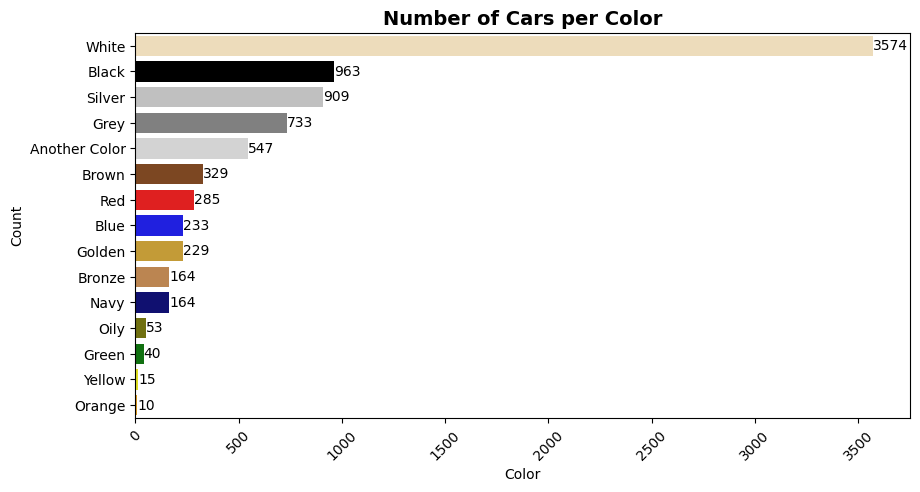

In [527]:
color_map = {
    "White": "wheat",
    "Black": "black",
    "Silver": "silver",
    "Gray": "gray",
    "Grey": "gray",
    "Red": "red",
    "Blue": "blue",
    "Dark Blue": "navy",
    "Navy": "navy",
    "Green": "green",
    "Dark Green": "darkgreen",
    "Beige": "beige",
    "Champagne": "wheat",
    "Brown": "saddlebrown",
    "Maroon": "maroon",
    "Yellow": "yellow",
    "Gold": "gold",
    "Golden": "goldenrod",
    "Bronze": "peru",
    "Oily": "olive",
    "Another Color": "lightgray",
    "Orange": "orange"
}




plt.figure(figsize=(10,5))
ax=sns.countplot(
    data=df,
    y="Color",
    order=df["Color"].value_counts().index,
    hue="Color",
    palette=color_map
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Number of Cars per Color", fontsize=14, weight="bold")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Disini terlihat bahwa warna paling populer dengan margin yang signifikan adalah warna Putih. Ini menunjukkan preferensi market untuk warna mobil putih dimana warna tersebut bisa mengurangi panas matahari di mobil, sesuai dengan daerah timur tengah.

### Region

In [528]:
import plotly.express as px

region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

fig = px.treemap(region_counts,
                 path=['Region'],
                 values='Count',
                 title="Listings per Region")

# Show region + number of listings inside boxes
fig.update_traces(textinfo="label+value")

# Adjust layout size (removes big margins)
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))

fig.show()


Di sini terlihat bahwa market terbesar ada di Riyadh, yang merupakan ibu kota dari Saudi Arabia. Ini diikuti dengan 2 kota besar lainnya yaitu Dammam Dan Jeddah, sedangkan daerah2 lain memiliki listing yang jauh lebih sedikit. Dengan total lebih dari 5500 dari 8000 sekian listing, maka mayoritas listing mobil ada di 3 kota besar Saudi Arabia

Origin

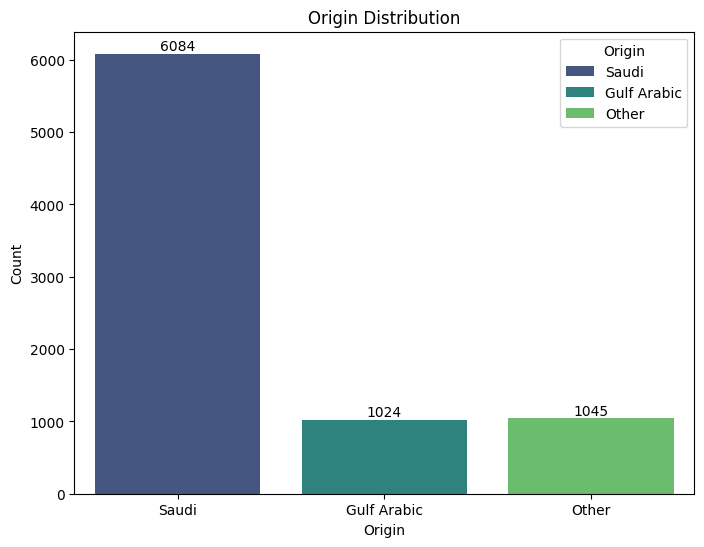

In [529]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Origin', data=df, hue='Origin', palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Origin Distribution")
plt.xlabel("Origin")
plt.ylabel("Count")
plt.show()

Data origin membuktikan bahwa kebanyakan mobil di listing berasal dari saudi pada saat pembelian baru. namun, lebih dari 1000 listing berasal dari negara2 gulf atau timur tengah lainnya, sedangkan 1050 sekian data tidak diketahui asalnya.

### Negotiable

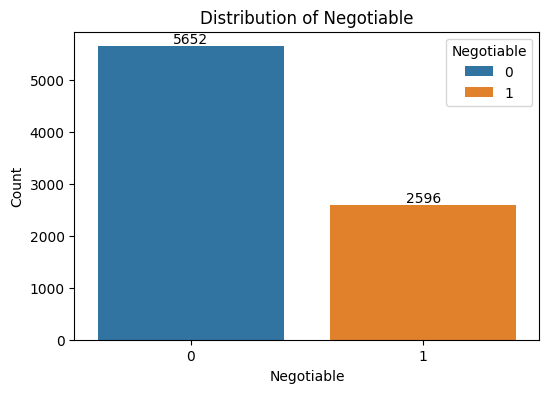

In [530]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Negotiable', data=df, hue='Negotiable', palette="tab10")
plt.title('Distribution of Negotiable')
plt.xlabel('Negotiable')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

Data di atas menunjukkan mayoritas listing sudah memiliki harga tetap, Namun, ada 2500 an  data yang memiliki status bisa di negosiasi. Ini berarti listing mobil tersebut dihargai 0, sehingga perlu dilakukan aksi untuk membersihkan data ini sebelum modelling.

## Data Pre-processing


### Outlier Sanity Check

Untuk membuang outlier, kita memerlukan data standar untuk memastikan ujung batas dari data. Menggunakan sanity check dimana kita melihat langsung di syarah.com dan kompetitornya seperti Dubizzle, terlihat bahwa mobil dengan mesin terbesar adalah 6.4 liter. Di boxplot sebelumnya terlihat bahwa ukuran mesin mobil di atas 8 adalah outlier, namun sanity check membuktikan outlier teratas yang sesungguhnya

In [531]:
count_above_64 = (df['Engine_Size'] > 6.4).sum()
print("Number of rows with Engine_Size above 6.4:", count_above_64)

Number of rows with Engine_Size above 6.4: 136


Setelah pengecekan, terlihat bahwa jumlah data outlier di atas 6.4 liter adalah 132, yang merupakan kurang dari 2% data, maka data ini bisa dibuang dengan efek minimal untuk representasi.

In [532]:
count_high_mileage = (df['Mileage'] > 900000).sum()
print("Number of rows with Mileage above 900,000:", count_high_mileage)

Number of rows with Mileage above 900,000: 48


In [533]:
count_low_mileage = (df['Mileage'] < 100).sum()
print("Number of rows with Mileage lower than 100:", count_low_mileage)

Number of rows with Mileage lower than 100: 0


Sanity check juga dilakukan untuk Mileage. berdasarkan beberapa referensi majalah dan badan automotif dunia seperti US department of Transport, mereka mengatakan bahwa rata2 mobil digunakan antara 12k sampai 15k Miles per tahun. Asumsikan bahwa sebuah mobil tertua di listing yaitu tahun 1963, digunakan reguler per tahun selama 60 tahun dengan rata2 teratas yaitu 15k, maka batas atas yang masuk akal adalah 900k miles. Terlihat data di atas batas ini sangat sedikit, kurang dari 1%, maka akan dibuang tanpa efek yang besar ke representasi. Namun, pembuangan outlier ini akan lebih baik jika dilakukan melalui data penggunaan atau Mileage per tahun, yang lebih memberi gambaran apakah jumlah mileage sebuah mobil itu masuk akal.

In [534]:
df_EDA = df[df['Negotiable'] == False].copy()

df_EDA.head()

,listing_id,Year,Engine_Size,Mileage,Price,Negotiable,Make,Type,Origin,Color,Options,Gear_Type,Fuel_Type,Condition,Region
0,1,2018,5.7,103000,114000.0,0,Chrysler,C300,Saudi,Black,Full,Automatic,Gas,Used,Riyadh
2,3,2019,1.5,72418,27500.0,0,Nissan,Sunny,Saudi,Silver,Standard,Automatic,Gas,Used,Riyadh
3,4,2019,1.6,114154,43000.0,0,Hyundai,Elantra,Saudi,Grey,Standard,Automatic,Gas,Used,Riyadh
4,5,2019,2.0,41912,59500.0,0,Hyundai,Elantra,Saudi,Silver,Semi Full,Automatic,Gas,Used,Riyadh
5,6,2018,1.5,39000,72000.0,0,Honda,Accord,Saudi,Navy,Full,Automatic,Gas,Used,Riyadh


In [535]:
df_EDA = df_EDA[(df_EDA['Engine_Size'] <= 6.4)]
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5543 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   listing_id   5543 non-null   int64  
 1   Year         5543 non-null   int64  
 2   Engine_Size  5543 non-null   float64
 3   Mileage      5543 non-null   int64  
 4   Price        5543 non-null   float64
 5   Negotiable   5543 non-null   int64  
 6    Make        5543 non-null   object 
 7   Type         5543 non-null   object 
 8   Origin       5518 non-null   object 
 9   Color        5543 non-null   object 
 10  Options      5504 non-null   object 
 11  Gear_Type    5525 non-null   object 
 12  Fuel_Type    5543 non-null   object 
 13  Condition    5543 non-null   object 
 14  Region       5543 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 692.9+ KB


In [536]:
#df_EDA = df_EDA[(df_EDA['Mileage'] <= 900000) & (df_EDA['Engine_Size'] <= 6.4)]
#df_EDA.info()

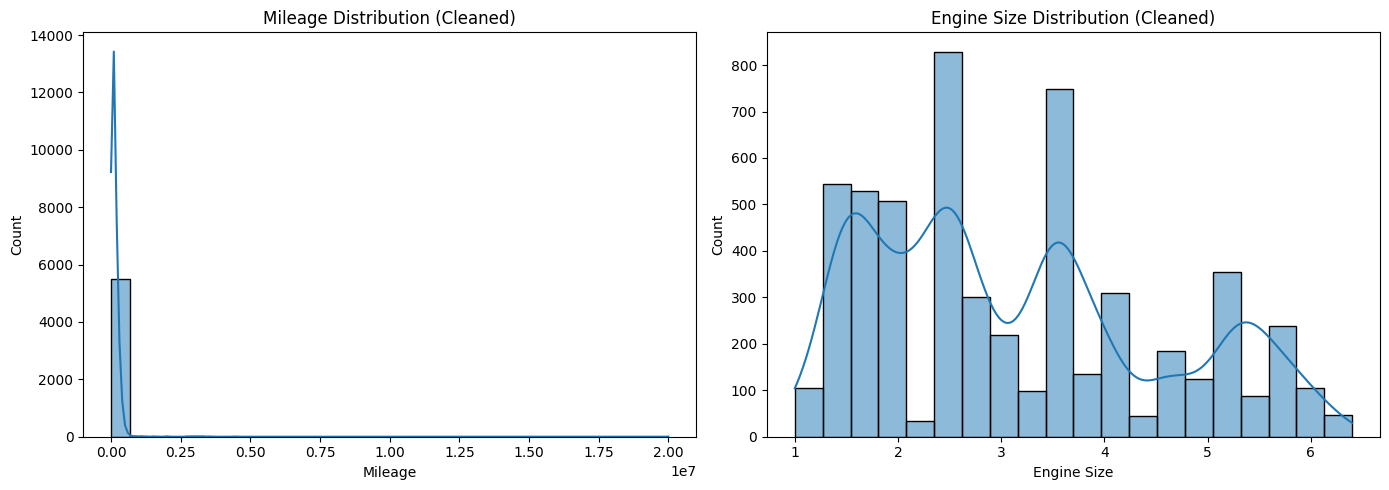

In [537]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_EDA['Mileage'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Mileage Distribution (Cleaned)")
axes[0].set_xlabel("Mileage")

sns.histplot(df_EDA['Engine_Size'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Engine Size Distribution (Cleaned)")
axes[1].set_xlabel("Engine Size")

plt.tight_layout()
plt.show()

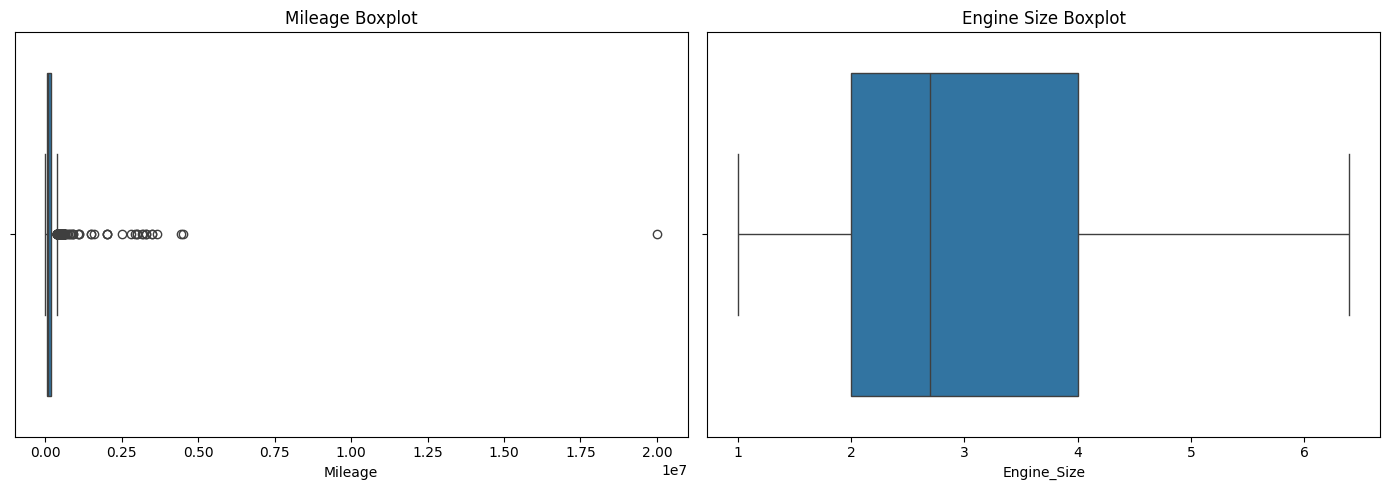

In [538]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df_EDA['Mileage'], ax=axes[0])
axes[0].set_title("Mileage Boxplot")

sns.boxplot(x=df_EDA['Engine_Size'], ax=axes[1])
axes[1].set_title("Engine Size Boxplot")

plt.tight_layout()
plt.show()

Terlihat bahwa engine size berhasil dibershkan dari outlier, namun Mileage masih memiliki outlier yang extreme, sampai 20 juta Miles. Aksi pembersihan lanjutan bisa digunakan dengan asumsi penggunaan mobil yaitu dengan membagi jumlah mileage dengan umur mobil. dari sini, kita bisa membuang mobil outlier tambahan tanpa memberi efek kepada representasi yang terbilang masuk akal.

### Age and Mileage_per_year

Untuk pembersihan dan insight analysis lebih lanjut, penggunaan per tahun bisa dilihat dengan membagi jumlah mileage dengan umur mobil. oleh karena itu, column "Age" dibuat dengan asumsi tahun terakhir dari tanggal author dataset mengunggah dataset ini ke Kaggle.com

In [539]:
df_EDA["Age"] = 2022 - df_EDA["Year"]
df_EDA["Mileage_per_year"] = (df_EDA["Mileage"] / df_EDA["Age"]).astype("int64")

df_EDA.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5543 entries, 0 to 8247
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   listing_id        5543 non-null   int64  
 1   Year              5543 non-null   int64  
 2   Engine_Size       5543 non-null   float64
 3   Mileage           5543 non-null   int64  
 4   Price             5543 non-null   float64
 5   Negotiable        5543 non-null   int64  
 6    Make             5543 non-null   object 
 7   Type              5543 non-null   object 
 8   Origin            5518 non-null   object 
 9   Color             5543 non-null   object 
 10  Options           5504 non-null   object 
 11  Gear_Type         5525 non-null   object 
 12  Fuel_Type         5543 non-null   object 
 13  Condition         5543 non-null   object 
 14  Region            5543 non-null   object 
 15  Age               5543 non-null   int64  
 16  Mileage_per_year  5543 non-null   int64  
dtype

terlihat bahwa data yang baru berhasil dibuat tanpa data loss

In [540]:
df_EDA.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,5543.0,3741.485838,2388.589359,1.0,1660.5,3538.0,5749.5,8248.0
Year,5543.0,2014.868483,5.116173,1963.0,2013.0,2016.0,2018.0,2021.0
Engine_Size,5543.0,3.129154,1.384212,1.0,2.0,2.7,4.0,6.4
Mileage,5543.0,139945.681580,336721.459035,100.0,47000.0,100200.0,180000.0,20000000.0
Price,5543.0,78248.316255,75493.894114,0.0,35000.0,58000.0,95000.0,1150000.0
Negotiable,5543.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,5543.0,7.131517,5.116173,1.0,4.0,6.0,9.0,59.0
Mileage_per_year,5543.0,20007.874797,27501.671946,3.0,10500.0,18200.0,26250.0,1538461.0


In [541]:
df_EDA.head()

,listing_id,Year,Engine_Size,Mileage,Price,Negotiable,Make,Type,Origin,Color,Options,Gear_Type,Fuel_Type,Condition,Region,Age,Mileage_per_year
0,1,2018,5.7,103000,114000.0,0,Chrysler,C300,Saudi,Black,Full,Automatic,Gas,Used,Riyadh,4,25750
2,3,2019,1.5,72418,27500.0,0,Nissan,Sunny,Saudi,Silver,Standard,Automatic,Gas,Used,Riyadh,3,24139
3,4,2019,1.6,114154,43000.0,0,Hyundai,Elantra,Saudi,Grey,Standard,Automatic,Gas,Used,Riyadh,3,38051
4,5,2019,2.0,41912,59500.0,0,Hyundai,Elantra,Saudi,Silver,Semi Full,Automatic,Gas,Used,Riyadh,3,13970
5,6,2018,1.5,39000,72000.0,0,Honda,Accord,Saudi,Navy,Full,Automatic,Gas,Used,Riyadh,4,9750


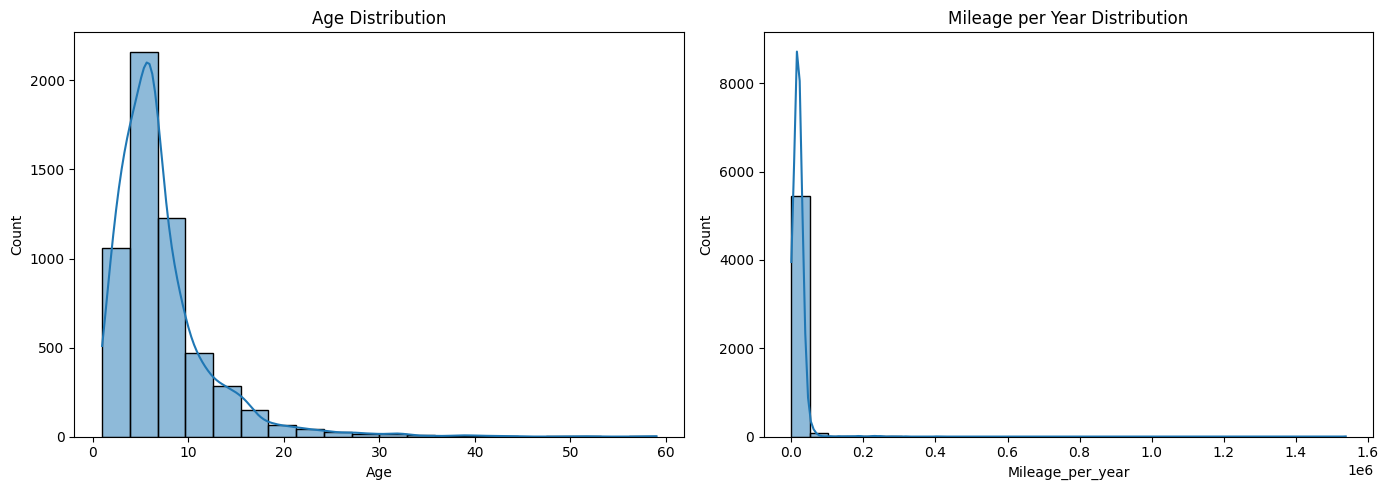

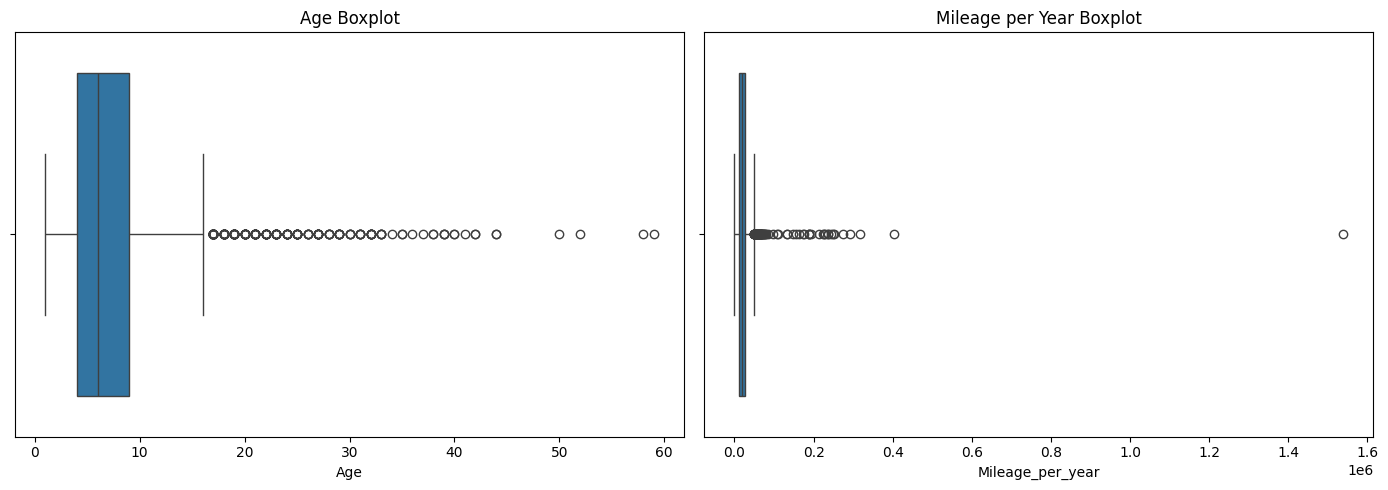

In [542]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_EDA['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df_EDA['Mileage_per_year'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Mileage per Year Distribution")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df_EDA['Age'], ax=axes[0])
axes[0].set_title("Age Boxplot")

sns.boxplot(x=df_EDA['Mileage_per_year'], ax=axes[1])
axes[1].set_title("Mileage per Year Boxplot")

plt.tight_layout()
plt.show()

Distribusi dari kedua kolom baru ini masih me representasikan outlier yang tinggi untuk Mileage per tahun, yaitu di atas 50k miles per tahun. Sedangkan distribusi Age berbanding terbalik sesuai dengan cara pembuatan data itu dari Year yaitu di atas 15 tahun.

### New Columns Outlier Removal

In [543]:
count_age_above_20 = (df_EDA['Age'] > 20).sum()
print(f"Number of rows with Age above 20 in df_EDA: {count_age_above_20}")

Number of rows with Age above 20 in df_EDA: 142


Sesuai dengan hasil boxplot, terlihat bahwa di atas 15 tahun terdapat outlier yang belum di lakukan pembersihan. Angka 20 tahun diambil untuk pengecekan kedua karena untuk 15 tahun, angkanya di asumsikan terlalu signifikan di atas 300 data. Dengan 139 data di atas 20 tahun, model akhir akan ada limitasi di atas usia tersebut dengan akurasi lebih baik untuk data point yang lebih banyak sampel nya.

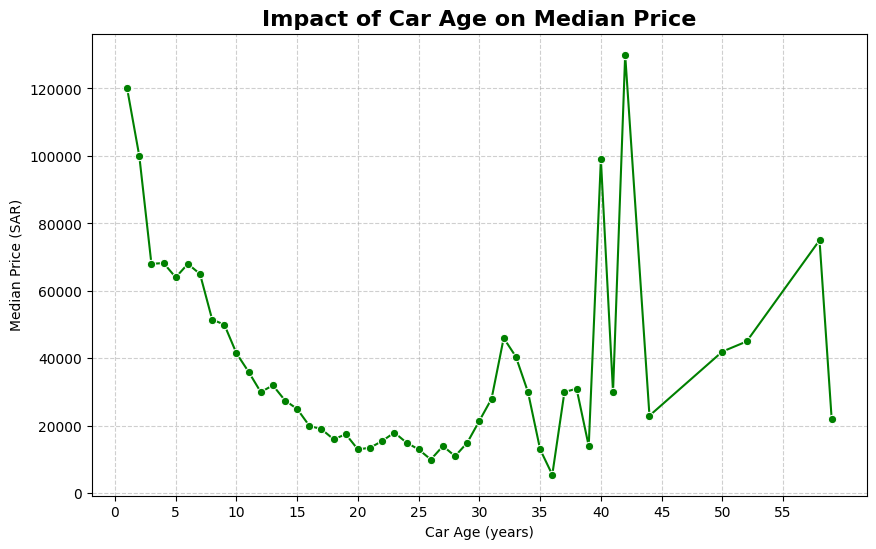

In [544]:
age_price = (
    df_EDA.groupby("Age")["Price"]
    .median()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=age_price,
    x="Age",
    y="Price",
    marker="o",
    color="green"
)

plt.title("Impact of Car Age on Median Price", fontsize=16, weight="bold")
plt.xlabel("Car Age (years)")
plt.ylabel("Median Price (SAR)")
plt.grid(True, linestyle="--", alpha=0.6)

max_age = age_price["Age"].max()
plt.xticks(np.arange(0, max_age+1, 5))

plt.show()


Disini juga bisa terlihat bahwa mobil di atas 25 tahun mulai tidak stabil. Ini bisa dijelaskan dengan adanya mobil koleksi dan antik yang dijual di syarah.com. Dengan ini, maka data di atas 20 tahun akan dibuang karena kurangnya representasi mobil koleksi/antik yang bagus.

In [545]:
count_mileage_per_year_above_50000 = (df_EDA['Mileage_per_year'] > 50000).sum()
print(f"Number of rows with Mileage per year above 50,000 in df_EDA: {count_mileage_per_year_above_50000}")

Number of rows with Mileage per year above 50,000 in df_EDA: 106


In [546]:
count_mileage_per_year_above_50000 = (df_EDA['Mileage_per_year'] > 35000).sum()
print(f"Number of rows with Mileage per year above 35,000 in df_EDA: {count_mileage_per_year_above_50000}")

Number of rows with Mileage per year above 35,000 in df_EDA: 523


Sanity check kami membuktikan bahwa rata2 pengendara di timur tengah terutama negara yang luas seperti saudi arabia memiliki rata2 mileage per tahun sekitar 20k miles ke bawah. Khusus untuk transportasi publik seperti taksi online, batas atas yang kami temukan adalah 35k per tahun. Namun, karena besarnya representasi mobil pada mileage ini, kami menggunakan hasil boxplot dan mengecek data di atas 50k per tahun. Terbukti bahwa jumlah representasinya lebih sedikit di angka 81 dibandingkan dengan 494 di 35k miles.

#### Clean Dataset for EDA

In [547]:
df_EDA = df_EDA[(df_EDA['Mileage_per_year'] <= 50000) & (df_EDA['Age'] <= 20)].copy()
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5297 entries, 0 to 8247
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   listing_id        5297 non-null   int64  
 1   Year              5297 non-null   int64  
 2   Engine_Size       5297 non-null   float64
 3   Mileage           5297 non-null   int64  
 4   Price             5297 non-null   float64
 5   Negotiable        5297 non-null   int64  
 6    Make             5297 non-null   object 
 7   Type              5297 non-null   object 
 8   Origin            5273 non-null   object 
 9   Color             5297 non-null   object 
 10  Options           5260 non-null   object 
 11  Gear_Type         5279 non-null   object 
 12  Fuel_Type         5297 non-null   object 
 13  Condition         5297 non-null   object 
 14  Region            5297 non-null   object 
 15  Age               5297 non-null   int64  
 16  Mileage_per_year  5297 non-null   int64  
dtype

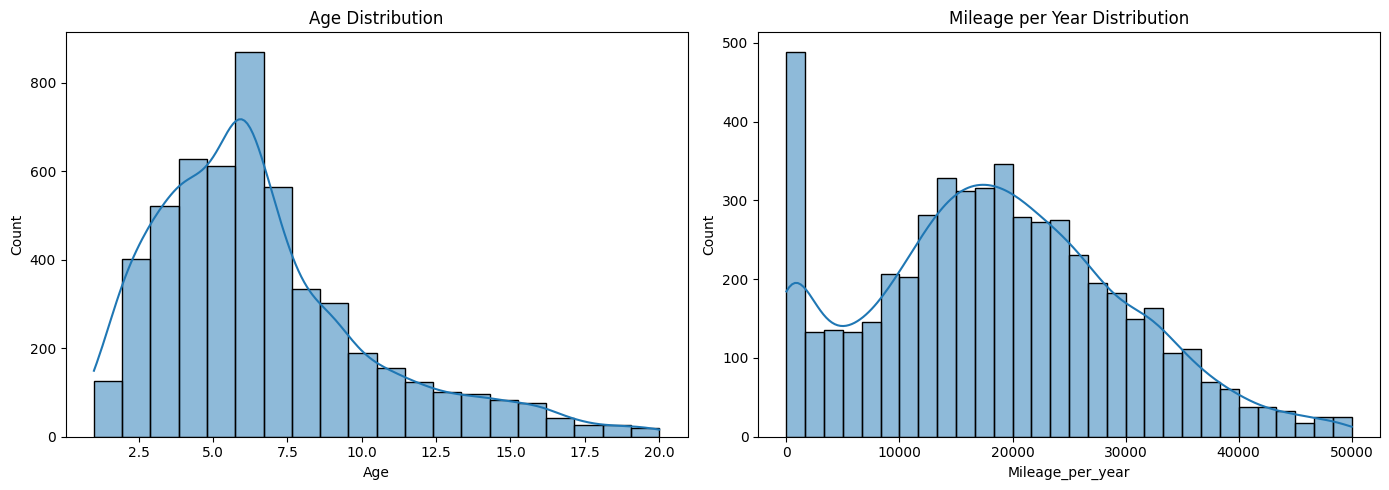

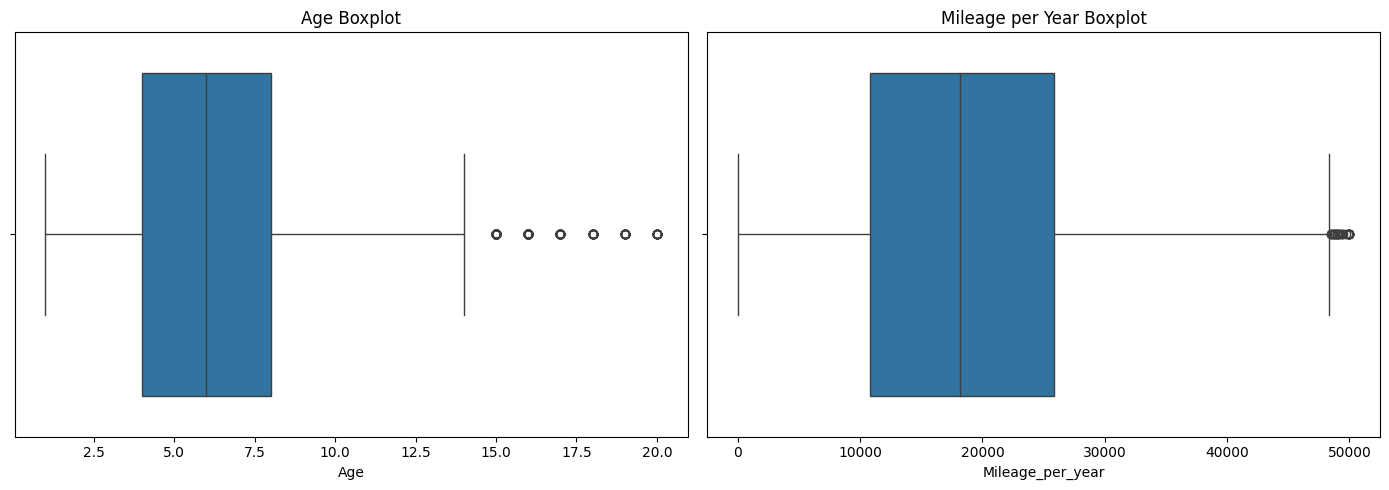

In [548]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_EDA['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df_EDA['Mileage_per_year'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Mileage per Year Distribution")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df_EDA['Age'], ax=axes[0])
axes[0].set_title("Age Boxplot")

sns.boxplot(x=df_EDA['Mileage_per_year'], ax=axes[1])
axes[1].set_title("Mileage per Year Boxplot")

plt.tight_layout()
plt.show()

In [549]:
print("Skewness of Mileage_per_year:", df_EDA['Mileage_per_year'].skew())
print("Skewness of Age:", df_EDA['Age'].skew())

Skewness of Mileage_per_year: 0.2377104411508551
Skewness of Age: 1.11715349758179


Bisa dilihat bahwa pembuangan outlier berhasil mereduksi outlier dengan lebih baik. Outlier di atas 14 tahun terlihat ada 6 cluster, sedangkan untuk mileage outlier ada di atas 48k miles namun lebih kecil distribusinya. Skewness untuk mileage ada di angka 0.23 yang menunjukkan data hampir simetris, sedangkan masih ada skew yang cukup signifikan untuk age. Beberapa referensi menunjukkan bahwa mobil dengan usia tua merupakan hal yang wajar di daerah Gulf, sehingga penemuan ini merepresentasikan demografis timur tengah sewajarnya.

### Empty Values

In [550]:
df_EDA.isnull().sum()

listing_id           0
Year                 0
Engine_Size          0
Mileage              0
Price                0
Negotiable           0
 Make                0
Type                 0
Origin              24
Color                0
Options             37
Gear_Type           18
Fuel_Type            0
Condition            0
Region               0
Age                  0
Mileage_per_year     0
dtype: int64

dari proses pre-processing sebelumnya ternyata berhasil membersihkan mayoritas dari Empty Values. jumlah empty value gabungan yang tersisa berasal dari kolum Origin, Options dan Gear Type total berjumlah 79 rows, yang merupakan jumlah yang cukup kecil, sehingga akan di drop untuk memastikan data yang bersih.

In [551]:
df_EDA = df_EDA.dropna().copy()
df_EDA.isnull().sum()

listing_id          0
Year                0
Engine_Size         0
Mileage             0
Price               0
Negotiable          0
 Make               0
Type                0
Origin              0
Color               0
Options             0
Gear_Type           0
Fuel_Type           0
Condition           0
Region              0
Age                 0
Mileage_per_year    0
dtype: int64

## Insights Analysis

### Median Price by Car Age

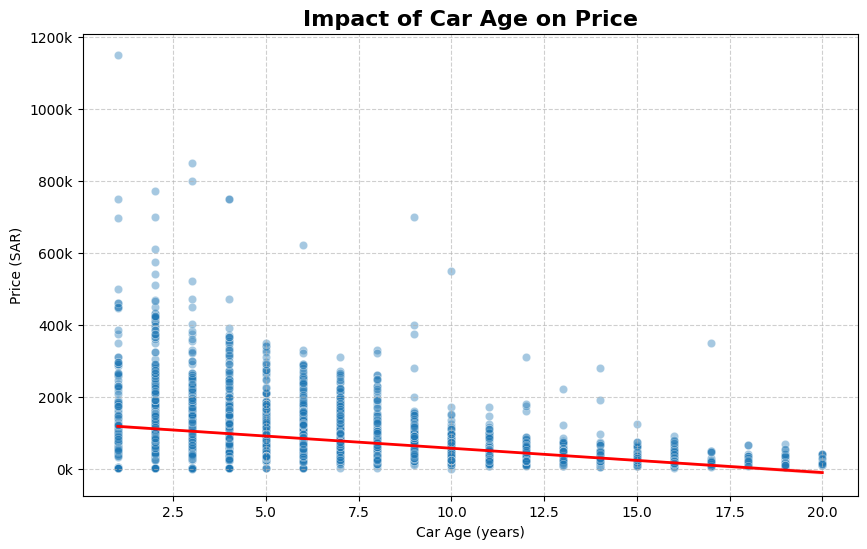

In [552]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df_EDA,
    x="Age",
    y="Price",
    alpha=0.4,
)

sns.regplot(
    data=df_EDA,
    x="Age",
    y="Price",
    scatter=False,
    color="red",
    line_kws={"linewidth":2}
)

plt.title("Impact of Car Age on Price", fontsize=16, weight="bold")
plt.xlabel("Car Age (years)")
plt.ylabel("Price (SAR)")

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Di scatterplot di atas bisa terlihat bahwa kebanyakan mobil ada di atas 10 tahun, namun ada kejatuhan harga yang signifikan di saat mobil berusia 8 tahun ke atas. trend line juga membuktikan bahwa ada relasi negatif antara usia mobil dan harga dimana semakin tua sebuah mobil maka semakin kecil harganya. Chart ini juga membuktikan bahwa pembuangan outlier menunjukkan distribusi listing kebanyakan ada di kurun harga menengah ke bawah yaitu 400k SAR ke bawah.

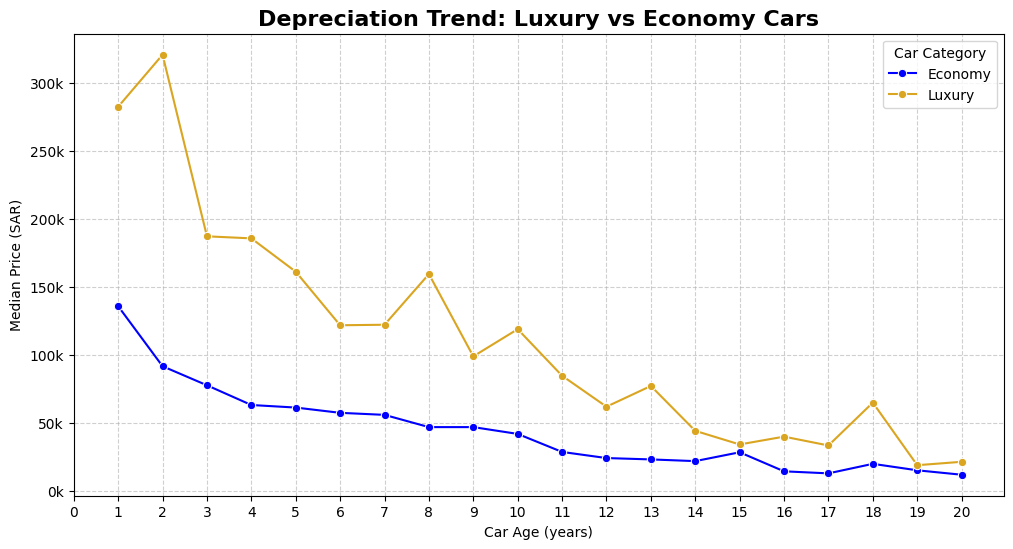

In [553]:
import matplotlib.ticker as mtick

median_price = (
    df_EDA.groupby([" Make ", "Age"])["Price"]
    .median()
    .reset_index()
)

top_makes = df_EDA[" Make "].value_counts().nlargest(10).index
median_price_top = median_price[median_price[" Make "].isin(top_makes)]


luxury_brands = {"Mercedes", "Lexus"}
median_price_grouped = (
    median_price_top
    .assign(
        Category=lambda d: d[" Make "].apply(lambda x: "Luxury" if x in luxury_brands else "Economy")
    )
    .groupby(["Category", "Age"])["Price"].median().reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=median_price_grouped,
    x="Age",
    y="Price",
    hue="Category",
    marker="o",
    palette={"Luxury": "#DAA520", "Economy": "blue"}
)

plt.title("Depreciation Trend: Luxury vs Economy Cars", fontsize=16, weight="bold")
plt.xlabel("Car Age (years)")
plt.ylabel("Median Price (SAR)")
plt.legend(title="Car Category")
plt.grid(True, linestyle="--", alpha=0.6)

# ✅ Format Y-axis to show in 'k'
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

max_age = median_price_grouped["Age"].max()
plt.xticks(np.arange(0, max_age+1, 1))

plt.show()


Depreciation line di atas didasarkan dari analisa 10 merek mobil terbanyak di Syarah.com, dimana kedua merek mewah atau luxury disana adalah Lexus dan mercedes. Dengan menggabungkan kedua merek tersebut untuk representasi mobil mewah, bisa terlihat bahwa mobil mewah kehilangan harga jual yang signifikan setelah 2 tahun. Ini sesuai dengan perilaku manufaktur didunia yang sering memberikan pengubahan dan improvisasi pada mobil mereka setiap 3-5 tahun. Untuk mobil ekonomi terlihat hilangnya harga justru di antara tahun pertama ke tahun ke 2. Ini merepresentasikan bahwa mobil ekonomi lebih kurang menarik untuk dibeli bekas setelah 1 tahun, namun menjadi lebih stabil antara 5 sampai 7 tahun.

### Car Usage vs Depreciation

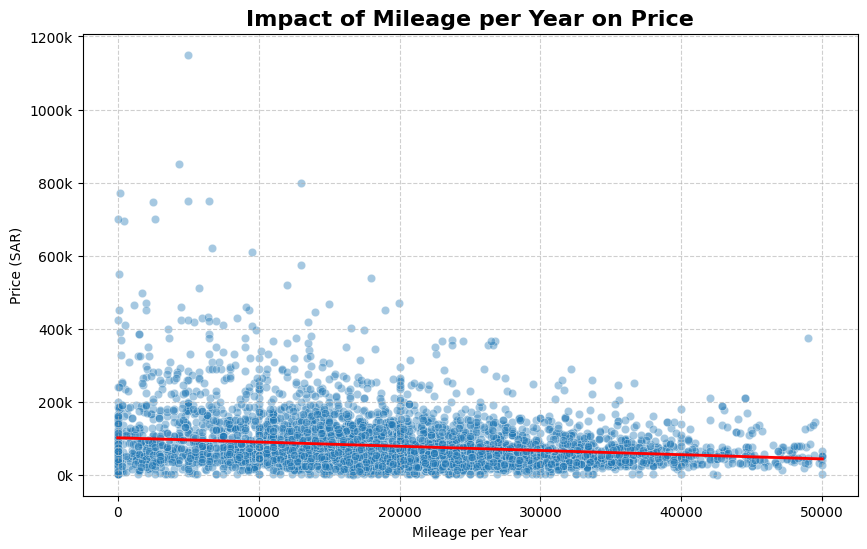

In [554]:
plt.figure(figsize=(10,6))

# Scatterplot
sns.scatterplot(
    data=df_EDA,
    x="Mileage_per_year",
    y="Price",
    alpha=0.4,
)

# Regression line
sns.regplot(
    data=df_EDA,
    x="Mileage_per_year",
    y="Price",
    scatter=False,
    color="red",
    line_kws={"linewidth":2}
)

# Titles & labels
plt.title("Impact of Mileage per Year on Price", fontsize=16, weight="bold")
plt.xlabel("Mileage per Year")
plt.ylabel("Price (SAR)")

# Format y-axis with 'k'
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


scatterplot diatas menunjukkan trend negatif yang relatif kecil di antara intensitas penggunaan dengan harga mobil itu sendiri.  beberapa titik harga terlihat tinggi di angka 20k miles ke bawah, yang menunjukkan bahwa mobil yang mahal tidak digunakan lebih dari normal di timur tengah, sedangkan mobil di sekitar SAR 100k ke bawah terlihat digunakan sampai batas maximal di 50k miles.

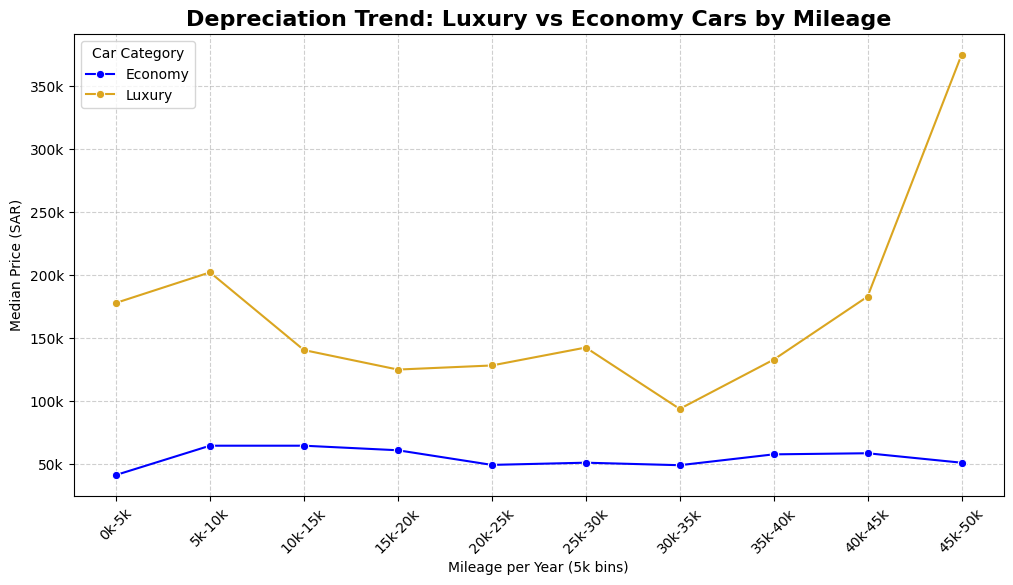

In [555]:
bin_size = 5000
bins = range(0, 50000 + bin_size, bin_size)
labels = [f"{i//1000}k-{(i+bin_size)//1000}k" for i in bins[:-1]]

df_EDA["Mileage_bin"] = pd.cut(
    df_EDA["Mileage_per_year"],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)


# Median price by make & mileage bin
median_price = (
    df_EDA.groupby([" Make ", "Mileage_bin", ], observed=False)["Price"]
    .median()
    .reset_index()
)

# Top 10 makes
top_makes = df_EDA[" Make "].value_counts().nlargest(10).index
median_price_top = median_price[median_price[" Make "].isin(top_makes)]

# Luxury vs Economy grouping
luxury_brands = {"Mercedes", "Lexus"}
median_price_grouped = (
    median_price_top
    .assign(
        Category=lambda d: d[" Make "].apply(lambda x: "Luxury" if x in luxury_brands else "Economy")
    )
    .groupby(["Category", "Mileage_bin"], observed=False)["Price"].median().reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=median_price_grouped,
    x="Mileage_bin",
    y="Price",
    hue="Category",
    marker="o",
    palette={"Luxury": "#DAA520", "Economy": "blue"}
)

plt.title("Depreciation Trend: Luxury vs Economy Cars by Mileage", fontsize=16, weight="bold")
plt.xlabel("Mileage per Year (5k bins)")
plt.ylabel("Median Price (SAR)")
plt.legend(title="Car Category")
plt.grid(True, linestyle="--", alpha=0.6)

# ✅ Format Y-axis to show in 'k'
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.xticks(rotation=45)  # cleaner labels
plt.show()

Chart di atas lebih memperjelas market antara mobil mewah dengan mobil ekonomi. Untuk mobil ekonomi mulai kehilangan harga jual setelah pemakaian di atas 20k, atau di atas rata2. sedangkan mobil mewah mulai hilang nilainya di penggunaan 5k sampai 10k ke atas.

### Region Analysis

Dengan jumlah region yang banyak namun kurang stabil distribusinya, maka kita akan meminimalisir region yang kurang memberi representasi.

In [556]:
region_counts = df_EDA['Region'].value_counts()
print("Number of rows per region:")
print(region_counts)

Number of rows per region:
Region
Riyadh            2230
Dammam            1087
Jeddah             752
Al-Medina          154
Qassim             147
Al-Ahsa            144
Makkah             132
Aseer              113
Tabouk              64
Taef                62
Khobar              60
Jubail              55
Jazan               52
Abha                35
Hafar Al-Batin      26
Hail                25
Al-Baha             21
Najran              20
Yanbu               18
Al-Jouf             15
Arar                12
Al-Namas            10
Besha                5
Qurayyat             5
Wadi Dawasir         4
Sakaka               4
Sabya                2
Name: count, dtype: int64


terlihat bahwa ada beberapa region dengan listing kurang dari 15. Angka 15 diambil agar region dibawahnya bisa bersatu menjadi region "Other" dan bisa menjadi region dengan representasi sekitar 50 an listing.

In [557]:
regions_to_aggregate = region_counts[region_counts <= 15].index

df_EDA['Region'] = df_EDA['Region'].replace(regions_to_aggregate, 'Other')

print(df_EDA['Region'].value_counts())

Region
Riyadh            2230
Dammam            1087
Jeddah             752
Al-Medina          154
Qassim             147
Al-Ahsa            144
Makkah             132
Aseer              113
Tabouk              64
Taef                62
Khobar              60
Other               57
Jubail              55
Jazan               52
Abha                35
Hafar Al-Batin      26
Hail                25
Al-Baha             21
Najran              20
Yanbu               18
Name: count, dtype: int64


terlihat bahwa representasi daerah minor menjadi limitasi model, namun bisa membuat jumlah region lebih sedikit, mengurangi kardinality dengan diharapkan efek positif ke akurasi model.

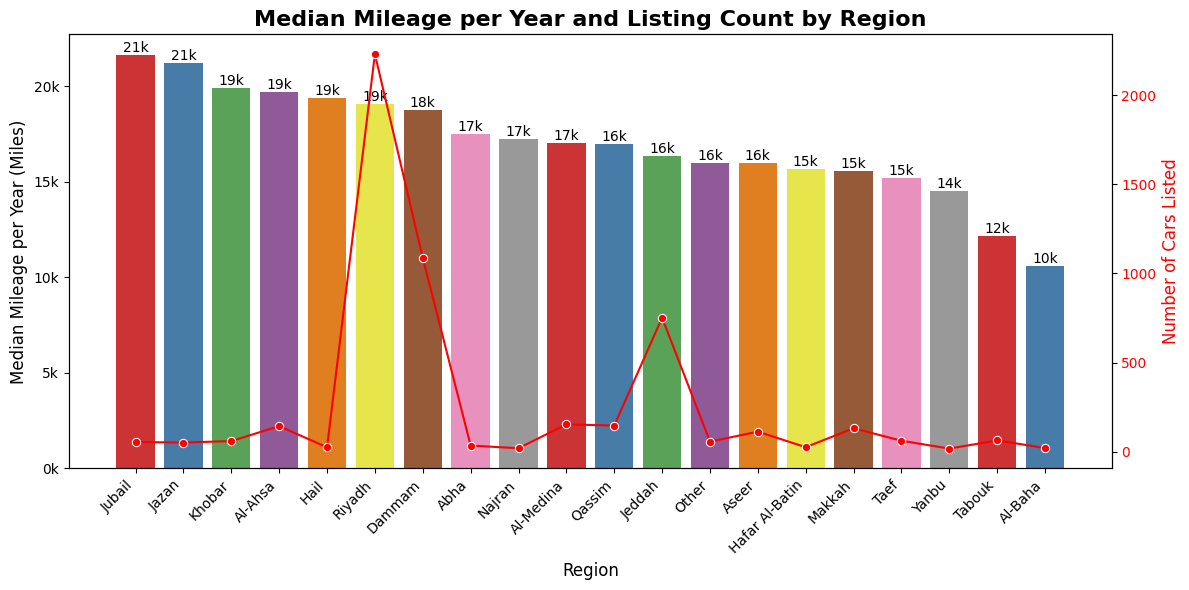

In [558]:
region_stats_mileage = (
    df_EDA.groupby("Region")
    .agg(median_mileage=("Mileage_per_year", "median"),
         count=("Mileage_per_year", "size"))
    .reset_index()
    .sort_values("median_mileage", ascending=False)
)

fig, ax1 = plt.subplots(figsize=(12,6))
bars = sns.barplot(
    data=region_stats_mileage,
    x="Region",
    y="median_mileage",
    ax=ax1,
    hue="Region",
    palette="Set1"
)

# --- Helper for K formatting ---
def format_k(val):
    return f"{int(val/1000)}k"

# Add bar labels in K
for container in bars.containers:
    bars.bar_label(container, fmt=lambda v: format_k(v))

# Format y-axis in K
import matplotlib.ticker as mticker
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))

ax1.set_ylabel("Median Mileage per Year (Miles)", fontsize=12)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_title("Median Mileage per Year and Listing Count by Region", fontsize=16, weight="bold")

# --- Line plot ---
ax2 = ax1.twinx()
sns.lineplot(
    data=region_stats_mileage,
    x="Region",
    y="count",
    marker="o",
    sort=False,
    color="red",
    ax=ax2
)

ax2.set_ylabel("Number of Cars Listed", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


disini terlihat bahwa mayoritas daerah memiliki pemakaian dibawah rata2 yaitu 20k miles, kecuali Jubail dan Jazan. Sedangkan daerah dengan pemakaian terendah ada di Yanbu, Tabouk dan Al-Baha. Perlu di perhatikan bahwa region2 tersebut termasuk minor, karena jeddah, dammam dan riyadh sebagai pasar terbesar memiliki penggunaan di bawah rata2 yaitu 19k-17k.

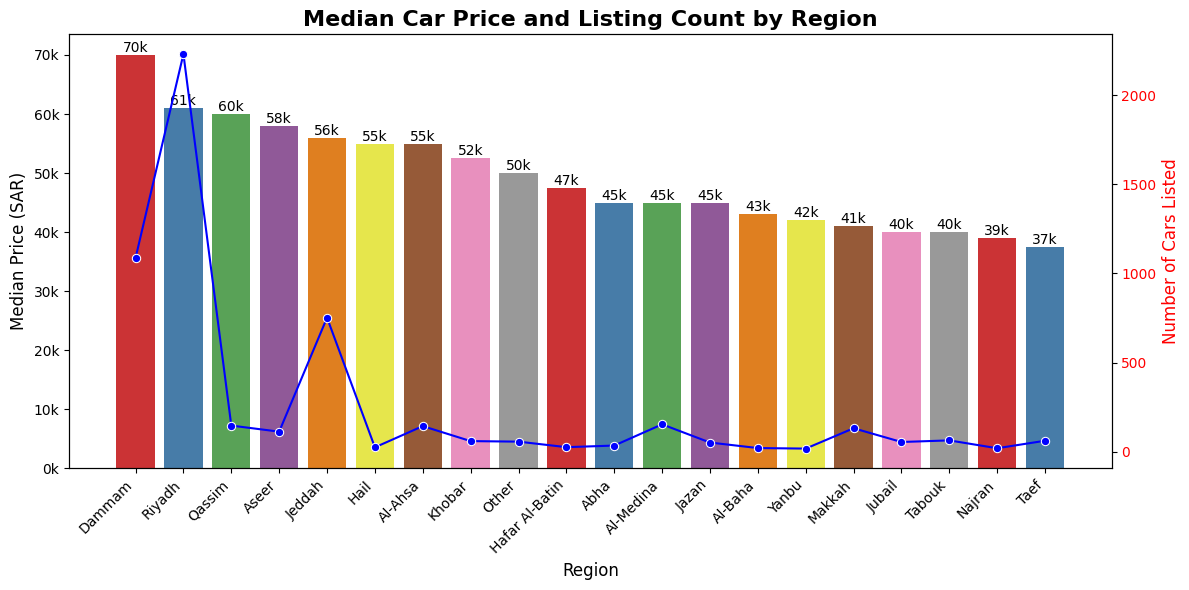

In [559]:
region_stats = (
    df_EDA.groupby("Region")
    .agg(median_price=("Price", "median"),
         count=("Price", "size"))
    .reset_index()
    .sort_values("median_price", ascending=False)
)

fig, ax1 = plt.subplots(figsize=(12,6))
bars = sns.barplot(
    data=region_stats,
    x="Region",
    y="median_price",
    ax=ax1,
    hue="Region",
    palette="Set1"
)


def format_k(val):
    return f"{int(val/1000)}k"


for container in bars.containers:
    bars.bar_label(container, fmt=lambda v: format_k(v))

ax1.set_ylabel("Median Price (SAR)", fontsize=12)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_title("Median Car Price and Listing Count by Region", fontsize=16, weight="bold")

import matplotlib.ticker as mticker
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))


ax2 = ax1.twinx()
sns.lineplot(
    data=region_stats,
    x="Region",
    y="count",
    marker="o",
    sort=False,
    color="blue",
    ax=ax2
)

ax2.set_ylabel("Number of Cars Listed", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


Chart di atas memberikan gambaran yang jelas tentang persepsi nilai oleh penjual di syarah.com. mobil dengan harga median termahal ada di dammam dan riyadh, menunjukkan bahwa mobil yang dijual di daerah tersebut lebih mahal. Ini bisa dijelaskan dengan demografis daerah itu sendiri yang merupakan kota besar, dimana pengendara ekonom atas lebih banyak. ini berbanding terbalik dnegan daerah termurah yaitu median 40k ke bawah di Jubail, Tabouk, najran dan taef yang merupakan daerah terpencil, lebih didominasi oleh warga lokal yang lebih tradisional.

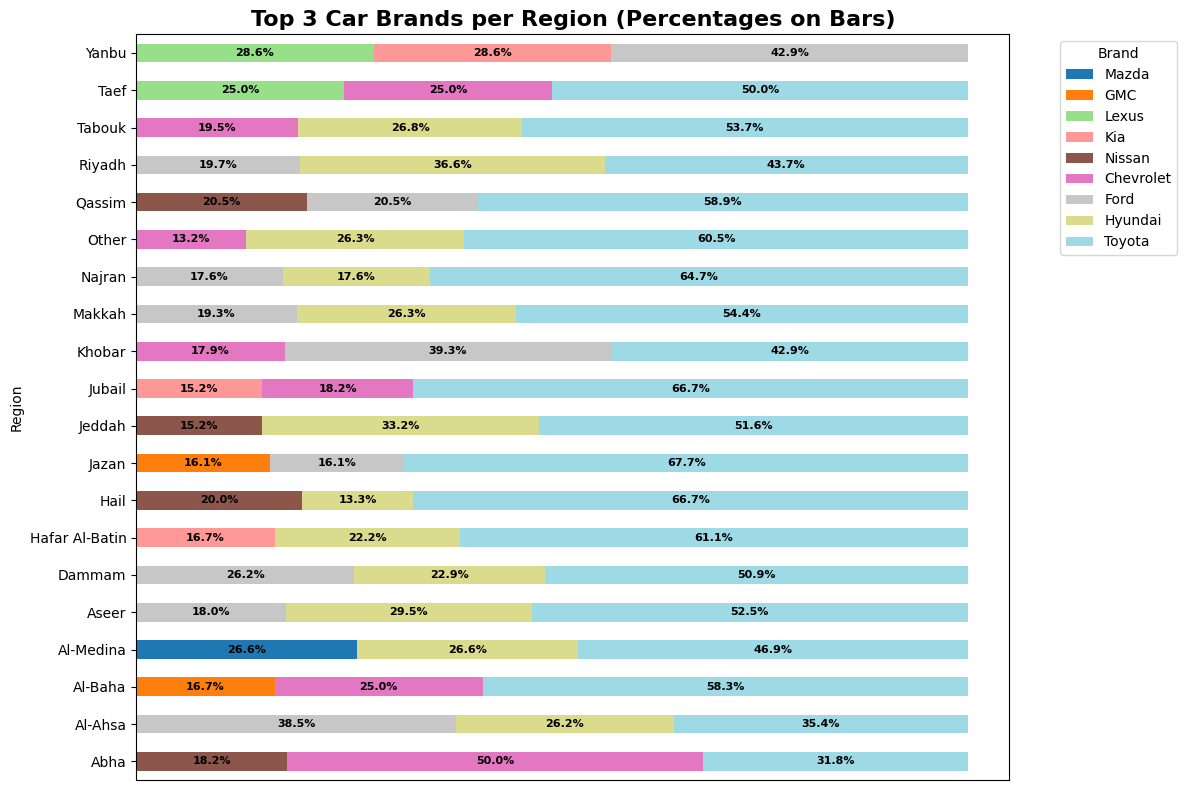

In [560]:
top_n = 3

dfs = []
for region, group in df_EDA.groupby("Region"):
    counts = group[" Make "].value_counts()
    top_brands = counts.nlargest(top_n)
    top_brands_pct = (top_brands / top_brands.sum() * 100).reset_index()
    top_brands_pct.columns = ["Make", "Percentage"]
    top_brands_pct["Region"] = region
    dfs.append(top_brands_pct)

top_brands_df = pd.concat(dfs, ignore_index=True)

stacked_df = top_brands_df.pivot(index="Region", columns="Make", values="Percentage").fillna(0)

stacked_df_sorted = stacked_df.apply(lambda row: row.sort_values(ascending=True), axis=1)


col_order = stacked_df.mean().sort_values(ascending=True).index
stacked_df_sorted = stacked_df[col_order]
ax = stacked_df_sorted.plot(
    kind='barh',
    stacked=True,
    figsize=(12,8),
    colormap='tab20'
)

ax.set_xticks([])
ax.set_xlabel("")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if width > 0:
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, f'{width:.1f}%',
                ha='center', va='center', fontsize=8, color='black', fontweight='bold')

plt.ylabel("Region")
plt.title(f"Top {top_n} Car Brands per Region (Percentages on Bars)", fontsize=16, weight='bold')
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Di chart diatas distribusi popularitas mobil bisa terlihat. Sesuai dengan analisa merek terpopuler sebelumnya kebanyakan daerah didominasi oleh toyota. 2 pengecualian ada di Abha dan Yanbu dimana Chevrolet mendominasi di daerah tersebut.

### Car Color vs Price


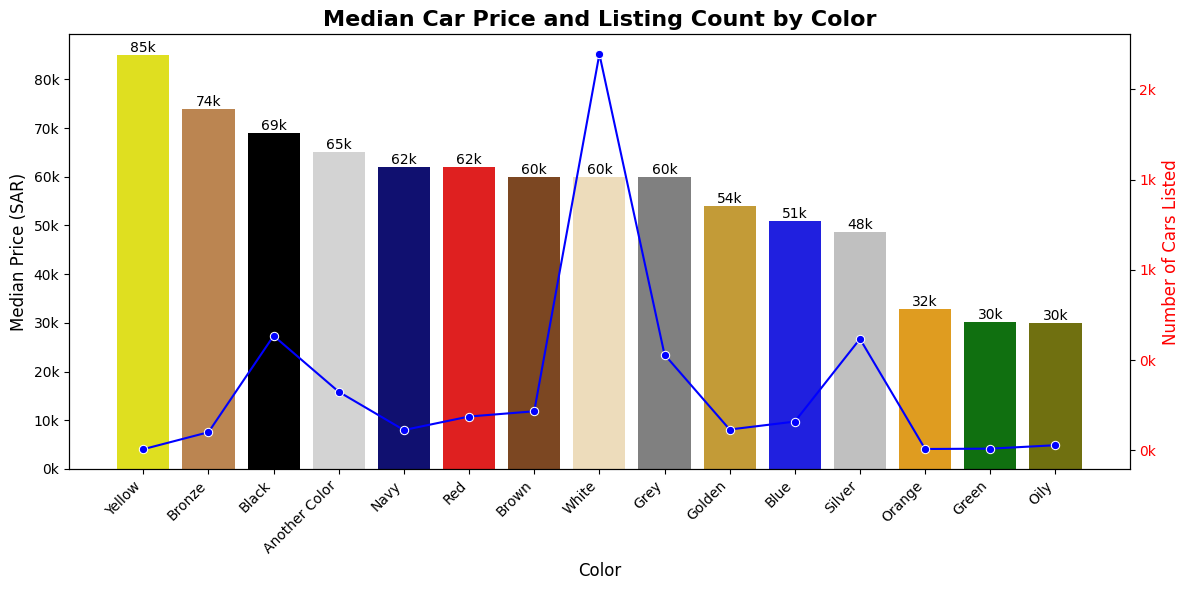

In [561]:
import matplotlib.ticker as mticker

color_stats = (
    df_EDA.groupby("Color")
    .agg(median_price=("Price", "median"),
         count=("Price", "size"))
    .reset_index()
    .sort_values("median_price", ascending=False)
)

fig, ax1 = plt.subplots(figsize=(12,6))
bars = sns.barplot(
    data=color_stats,
    x="Color",
    y="median_price",
    ax=ax1,
    hue="Color",
    palette=color_map,
    order=color_stats["Color"]
)


for container in bars.containers:
    bars.bar_label(container, fmt=lambda v: f"{int(v/1000)}k")


ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
ax1.set_ylabel("Median Price (SAR)", fontsize=12)
ax1.set_xlabel("Color", fontsize=12)
ax1.set_title("Median Car Price and Listing Count by Color", fontsize=16, weight="bold")


ax2 = ax1.twinx()
sns.lineplot(
    data=color_stats,
    x="Color",
    y="count",
    marker="o",
    sort=False,
    color="blue",
    ax=ax2
)

ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
ax2.set_ylabel("Number of Cars Listed", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


Di chart di atas terlihat bahwa warna Kuning, bronze dan hitam adalah 3 warna termahal. Namun perlu digaris bawahi bahwa kuning dan bronze memiliki representasi yang sangat sedikit. Putih sebagai warna yang sangat lebih populer ternyata tidak memberikan efek dimana harganya termasuk rata2 di 60k median. 3 warna yang paling murah adalah orange, green dan oily green. Hal ini bisa dijelaskan dengan preferensi setiap orang dan warna unik sebuah brand, contohnya warna kuning sering terlihat di merek Lamborghini dan Bronze di Bentley, keduanya merek mahal. Sedangkan warna terbawah merupakan warna yang jarang ditemukan sesuai data jumlah listing.

### Do Certain Car Brand Owner Uses Their Car More?

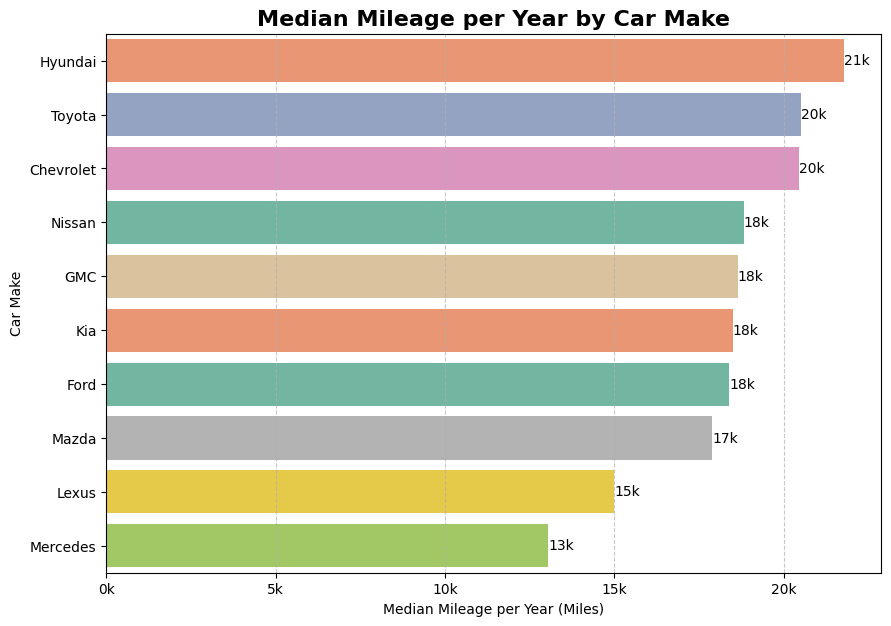

In [562]:
import matplotlib.ticker as mticker

make_medians = (
    df_EDA[df_EDA[" Make "].isin(top_makes)]
    .groupby(" Make ")["Mileage_per_year"]
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    data=df_EDA[df_EDA[" Make "].isin(top_makes)],
    y=" Make ",
    x="Mileage_per_year",
    estimator="median",
    order=make_medians.index,
    hue=" Make ",
    palette="Set2",
    errorbar=None
)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))

for container in ax.containers:
    ax.bar_label(container, fmt=lambda v: f"{int(v/1000)}k")

plt.title("Median Mileage per Year by Car Make", fontsize=16, weight="bold")
plt.ylabel("Car Make")
plt.xlabel("Median Mileage per Year (Miles)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Chart di atas ditujukan untuk melihat apakah ada perbedaan dari pola pengguna setiap brand mobil. Terlihat bahwa hyundai, chevrolet dan toyota lebih mendekati rata2 yaitu 20k, membuktikan merek2 tersebut bukanlah mobil rekreasi, berbanding terbalik dengan lexus dan mercedes yang merupakan mobil mewah, dimana market mereka didominasi kalangan atas yang memiliki budget lebih.

### Impact of Fuel Type vs Price

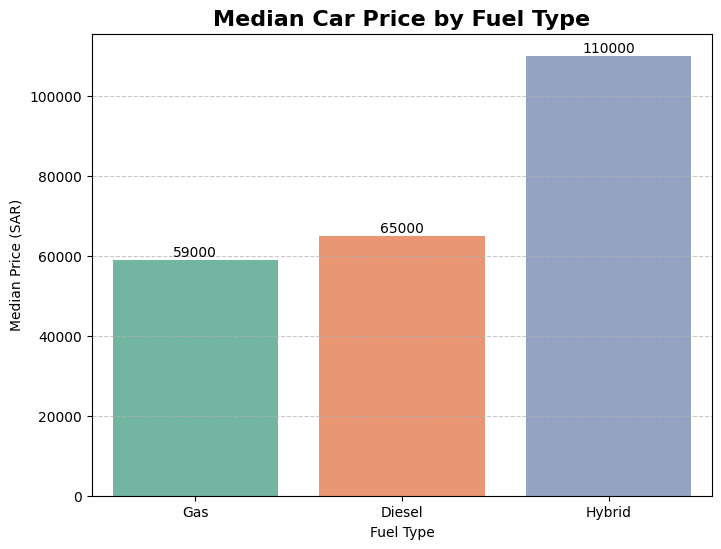

In [563]:
plt.figure(figsize=(8,6))

ax=sns.barplot(
    data=df_EDA,
    x="Fuel_Type",
    y="Price",
    estimator="median",
    hue="Fuel_Type",
    palette="Set2",
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Median Car Price by Fuel Type", fontsize=16, weight="bold")
plt.xlabel("Fuel Type")
plt.ylabel("Median Price (SAR)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Chart di atas menunjukkan bahwa mobil bensin adalah termurah, sejauh SAR 6000 dibanding median harga mobil diesel. Hybrid sendiri harganya melambung tinggi karena tipe mesih tersebut didominasi mobil mewah dan kategori atas, seperti mercedes, bmw, dan beberapa merek supercar. Kelimpahan minyak bensin juga bisa menjadi faktor untuk mendorong harga mesin bensin ke bawah.

### Gear Type vs Price

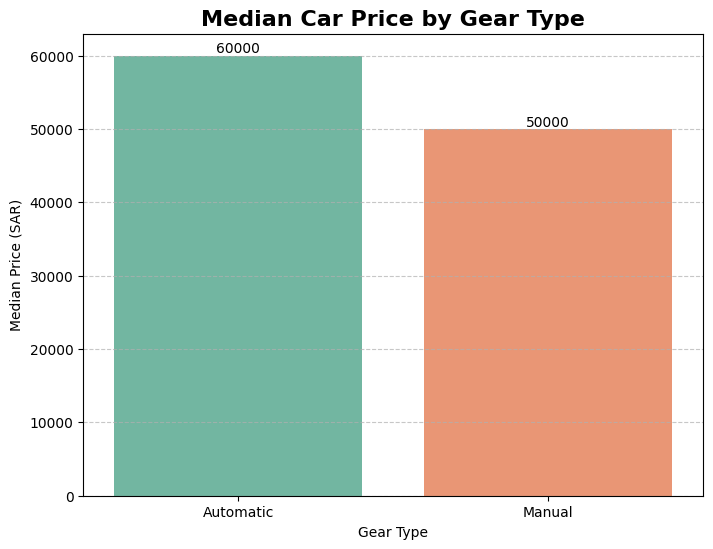

In [564]:
plt.figure(figsize=(8,6))

ax=sns.barplot(
    data=df_EDA,
    x="Gear_Type",
    y="Price",
    estimator="median",
    hue="Gear_Type",
    palette="Set2",
    errorbar=None
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Median Car Price by Gear Type", fontsize=16, weight="bold")
plt.xlabel("Gear Type")
plt.ylabel("Median Price (SAR)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Data ini menunjukkan adanya perbedaan 20% di median harga mobil automatic dan manual. Ini termasuk batas normal yang bisa ditemukan di banyak market dunia, dimana mobil automatic biasanya lebih mahal dari manual. Di demografis timur tengah dengan jalan yang jauh dan luas maka permintaan untuk transmisi yang praktis lebih besar.

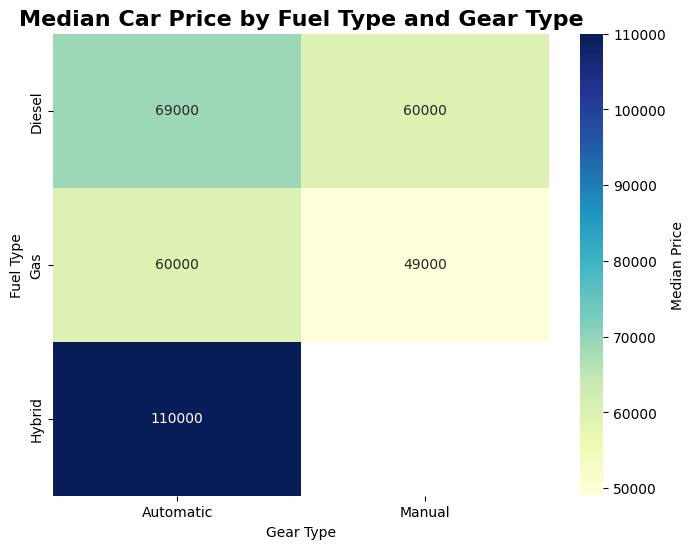

In [565]:
pivot = df_EDA.pivot_table(
    index="Fuel_Type",
    columns="Gear_Type",
    values="Price",
    aggfunc="median"
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={"label": "Median Price"})
plt.title("Median Car Price by Fuel Type and Gear Type", fontsize=16, weight="bold")
plt.ylabel("Fuel Type")
plt.xlabel("Gear Type")
plt.show()


Disini bisa terlihat bahwa hybrid tidak memiliki data manual, sesuai dengan asumsi merek pembuat yaitu merek mobil mewah. sedangkan harga kombinasi diesel dengan manual pun terbukti lebih murah walau dibandingkan dengan mobil automatic bensin.

### Engine Size vs Price

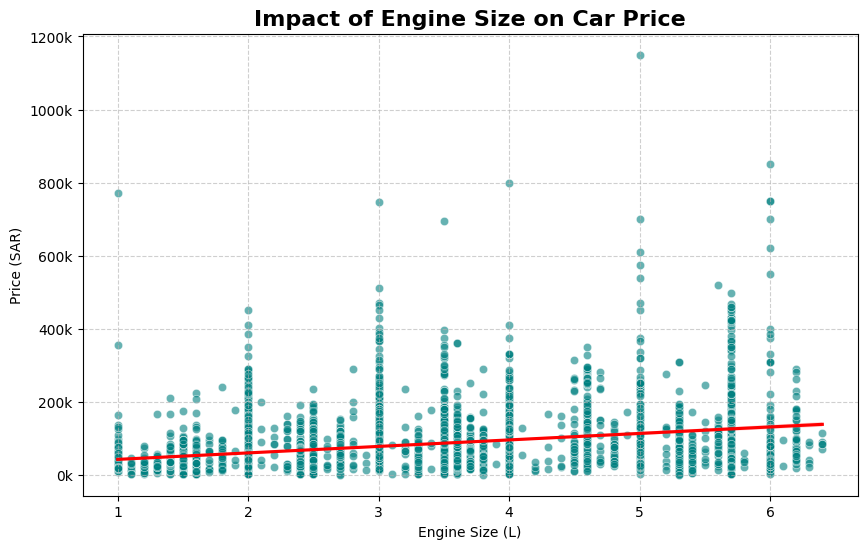

In [566]:
import matplotlib.ticker as mticker

plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=df_EDA,
    x="Engine_Size",
    y="Price",
    alpha=0.6,
    color="teal"
)

sns.regplot(
    data=df_EDA,
    x="Engine_Size",
    y="Price",
    scatter=False,
    color="red",
    ax=ax
)

plt.title("Impact of Engine Size on Car Price", fontsize=16, weight="bold")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (SAR)")
plt.grid(True, linestyle="--", alpha=0.6)

# ✅ Format y-axis into k
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.show()


Engine size atau ukuran mesin biasanya adalah faktor besar terhadap harga. bisa dilihat bahwa distribusi mesih kebanyakan di antara 2 liter, 3 liter, dan 5-5.7 liter. Ini sesuai dengan demografis dimana kebanyakan mobil yang dijual seperti toyota land cruiser dan hilux adalah mobil berbadan besar seperti Pickup dan SUV, yang memerlukan mesin besar.

Ini juga dibuktikan dengan populasi mobil perkotaan ekonomis seperti hyundai accent, toyota camry dan hyundai sonata yang memiliki mesin 3 liter ke bawah. Bisa terlihat ada trend positif antara besar mesin dengan harga, dimana harga mobil dengan mesin 2L dengan 3L terpaut sekitar 20% kenaikan.

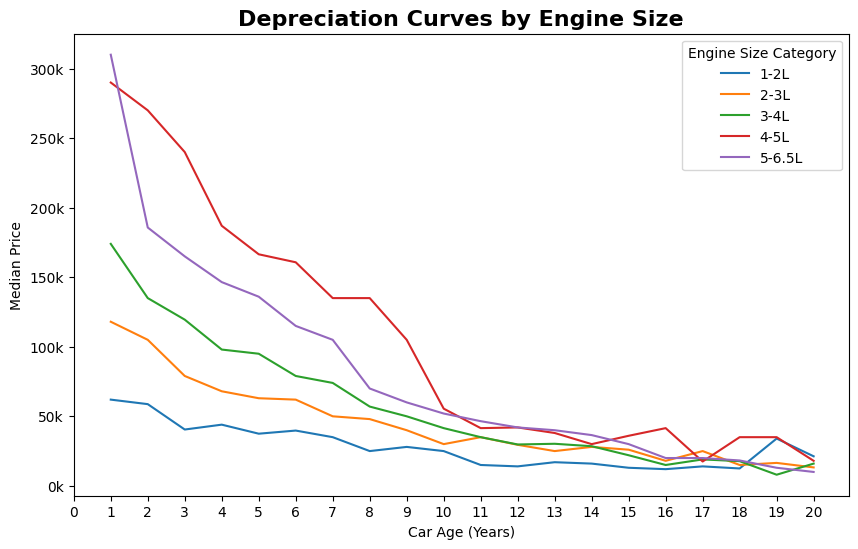

In [567]:
bins = [1, 2, 3, 4, 5, 6.5]
labels = ["1-2L", "2-3L", "3-4L", "4-5L", "5-6.5L"]

df_EDA["Engine_Category"] = pd.cut(
    df_EDA["Engine_Size"], bins=bins, labels=labels, include_lowest=True
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_EDA,
    x="Age",
    y="Price",
    hue="Engine_Category",
    estimator="median",
    errorbar=None
)

plt.title("Depreciation Curves by Engine Size", fontsize=16, weight="bold")
plt.xlabel("Car Age (Years)")
plt.ylabel("Median Price")
plt.legend(title="Engine Size Category")

# format y-axis as k
import matplotlib.ticker as mticker
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

max_age = int(df_EDA["Age"].max())
plt.xticks(range(0, max_age+1, 1))

plt.show()


Chart di atas membuktikan persepsi market kepada mesin mobil. Mesin yang relatif kecil memiliki retensi harga terbaik sedangkan 2 kategori dengan retensi terburuk ada di atas 4 Liter. ini sesuai dengan trend manufaktur yang berhenti memproduksi mesin besar untuk mobil baru dan juga kondisi ketersediaan minyak dan politik. dibandingkan mesin 1-2L, mobil bermesin di atas 4L kehilangan lebih dari 80% harga jual dalam 10 tahun sedangkan mobil ekonomis kehilangan sekitar 50%.

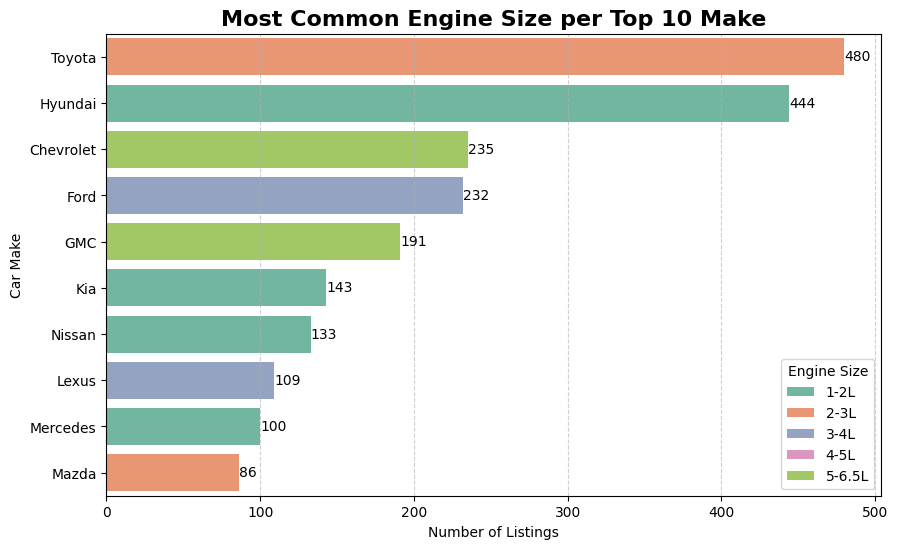

In [568]:
df_top = df_EDA[df_EDA[" Make "].isin(top_makes)]

engine_count = df_top.groupby([" Make ", "Engine_Category"],observed=False).size().reset_index(name="Count")

most_common_engine = engine_count.loc[engine_count.groupby(" Make ")["Count"].idxmax()]

most_common_engine = most_common_engine.sort_values("Count", ascending=False)


plt.figure(figsize=(10,6))
ax=sns.barplot(
    data=most_common_engine,
    y=" Make ",
    x="Count",
    hue="Engine_Category",
    dodge=False,
    palette="Set2"
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Most Common Engine Size per Top 10 Make", fontsize=16, weight="bold")
plt.xlabel("Number of Listings")
plt.ylabel("Car Make")
plt.legend(title="Engine Size")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


Disini distribusi mesin mobil per merek bisa terlihat. Demografis dari manufaktur adalah mesin medium-kecil untuk mobil luxury seperti mercedes dan lexus, sedangkan mobil merek amerika serikat seperti chevrolet dan ford ada di menengah ke atas. ini  sesuai dengan produk mereka yang di listing dimana ford memberi representasi pickup truk yang cukup banyak, sedangkan hyundai lebih ekonomis di 2L ke bawah.

### Options vs Price

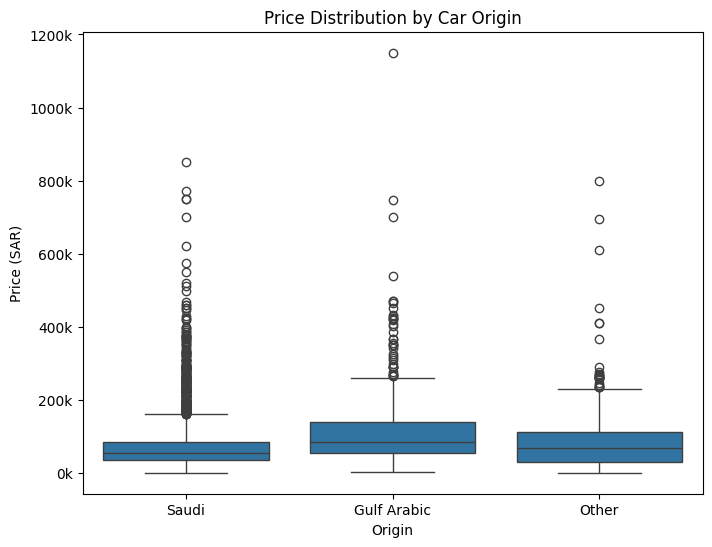

In [569]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Origin', y='Price', data=df_EDA)
plt.title('Price Distribution by Car Origin')
plt.xlabel('Origin')
plt.ylabel('Price (SAR)')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.show()

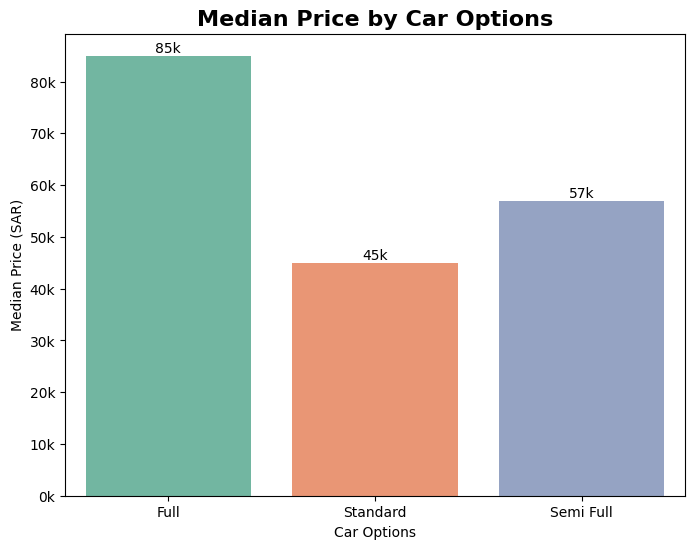

In [570]:
plt.figure(figsize=(8,6))
ax=sns.barplot(
    data=df_EDA,
    x="Options",
    y="Price",
    palette="Set2",
    hue="Options",
    estimator="median",
    errorbar=None
)

def format_k(val):
    return f'{int(val/1000)}k'
for container in ax.containers:
    ax.bar_label(container, fmt=format_k)

import matplotlib.ticker as mticker
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format_k(x)))
plt.title("Median Price by Car Options", fontsize=16, weight="bold")
plt.ylabel("Median Price (SAR)")
plt.xlabel("Car Options")
plt.show()


Sesuai dengan asumsi awal, ada perbedaan harga antara jenis opsi mobil. terlihat bahwa mobil dengan opsi full hampir 90% lebih mahal, sedangkan mobil semi full sekitar 30% lebih mahal. semi full sendiri terpaut 65% lebih murah dari full.

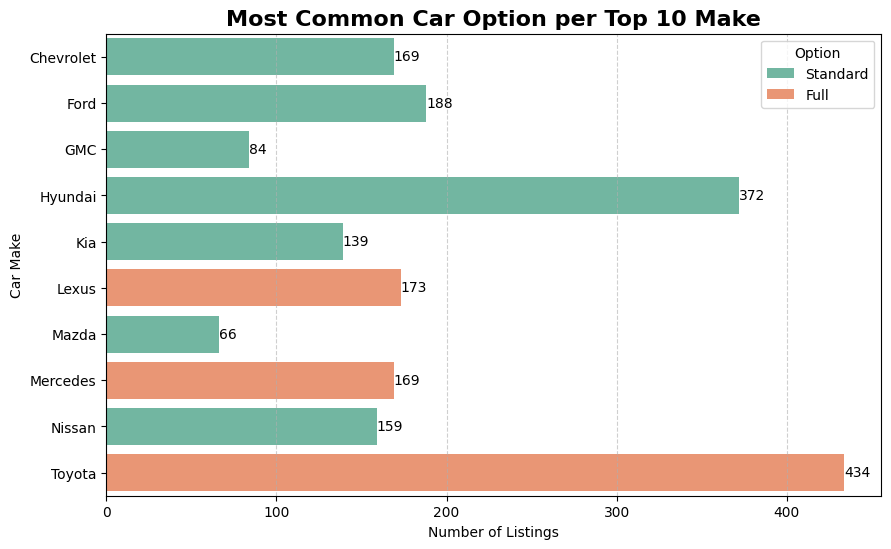

In [571]:
df_top = df_EDA[df_EDA[" Make "].isin(top_makes)]
options_count = df_top.groupby([" Make ", "Options"]).size().reset_index(name="Count")


most_common_options = options_count.loc[options_count.groupby(" Make ")["Count"].idxmax()]


plt.figure(figsize=(10,6))
ax=sns.barplot(
    data=most_common_options,
    y=" Make ",
    x="Count",
    hue="Options",
    dodge=False,
    palette="Set2"
)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Most Common Car Option per Top 10 Make", fontsize=16, weight="bold")
plt.xlabel("Number of Listings")
plt.ylabel("Car Make")
plt.legend(title="Option")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()
